# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling.profile_report

import re
import seaborn as sns
sns.set(style = 'white')

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

/Users/minkim/anaconda3/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/minkim/anaconda3/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_41414/1173114221.py:3: DeprecationWarning: `import pandas_profiling` i

In [2]:
color = ['#ec838a', '#9b9c9a', '#f3babc']

# A. 데이터 전처리

## 1. 데이터 호출

In [3]:
df = pd.read_csv('churn.csv', encoding='euc-kr')
df.head()
# df.profile_report()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

## 2. 데이터 구조 평가

In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [6]:
df.describe()

age  number_of_dependents      zip_code     latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         longitude  number_of_referrals  tenure_in_months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       avg_monthly_long_distance_charges  avg_monthly_gb_download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       total_long_distance_charges  total_revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

- **데이터는 통신사 고객이 평균 32개월동안 머물면서 (tenure in months) 월 64달러를 지불하고 있음(monthly charge)을 대략적으로 나타내고 있음.**

In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'number_of_dependents', 'zip_code', 'number_of_referrals', 'tenure_in_months', 'total_extra_data_charges'], float64: ['latitude', 'longitude', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_long_distance_charges', 'total_revenue'], object: ['customer_id', 'gender', 'married', 'city', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'customer_status', 'churn_category', 'churn_reason']}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              7043 non-null   objec

In [9]:
df.duplicated('customer_id', keep=False).sum()

0

In [10]:
df.isnull().sum().to_frame('nan_count')

nan_count
customer_id                                0
gender                                     0
age                                        0
married                                    0
number_of_dependents                       0
city                                       0
zip_code                                   0
latitude                                   0
longitude                                  0
number_of_referrals                        0
tenure_in_months                           0
offer                                      0
phone_service                              0
avg_monthly_long_distance_charges        682
multiple_lines                           682
internet_service                           0
internet_type                           1526
avg_monthly_gb_download                 1526
online_security                         1526
online_backup                           1526
device_protection_plan                  1526
premium_tech_support                    1526
streaming_tv                            1526
streaming_movies                        1526
streaming_music                         1526
unlimited_data                          1526
contract                                   0
paperless_billing                          0
payment_method                             0
monthly_charge                             0
total_charges                              0
total_refunds                              0
total_extra_data_charges                   0
total_long_distance_charges                0
total_revenue                              0
customer_status                            0
churn_category                          5174
churn_reason                            5174

In [11]:
# 고유값 식별
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}의 고유값 개수 : {df[col].nunique()}')

customer_id의 고유값 개수 : 7043
gender의 고유값 개수 : 2
married의 고유값 개수 : 2
city의 고유값 개수 : 1106
offer의 고유값 개수 : 6
phone_service의 고유값 개수 : 2
multiple_lines의 고유값 개수 : 2
internet_service의 고유값 개수 : 2
internet_type의 고유값 개수 : 3
online_security의 고유값 개수 : 2
online_backup의 고유값 개수 : 2
device_protection_plan의 고유값 개수 : 2
premium_tech_support의 고유값 개수 : 2
streaming_tv의 고유값 개수 : 2
streaming_movies의 고유값 개수 : 2
streaming_music의 고유값 개수 : 2
unlimited_data의 고유값 개수 : 2
contract의 고유값 개수 : 3
paperless_billing의 고유값 개수 : 2
payment_method의 고유값 개수 : 3
customer_status의 고유값 개수 : 3
churn_category의 고유값 개수 : 5
churn_reason의 고유값 개수 : 20


## 3. 대상 변수 분포 확인

In [12]:
df['customer_status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64

### 3-1. 전체 고객 이탈 및 유지

In [13]:
customer = df['customer_status'].value_counts()
customerRatio = customer / df.shape[0] * 100
print(customer)
print(customerRatio)

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64
Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: customer_status, dtype: float64


In [14]:
customerRatio.index

Index(['Stayed', 'Churned', 'Joined'], dtype='object')

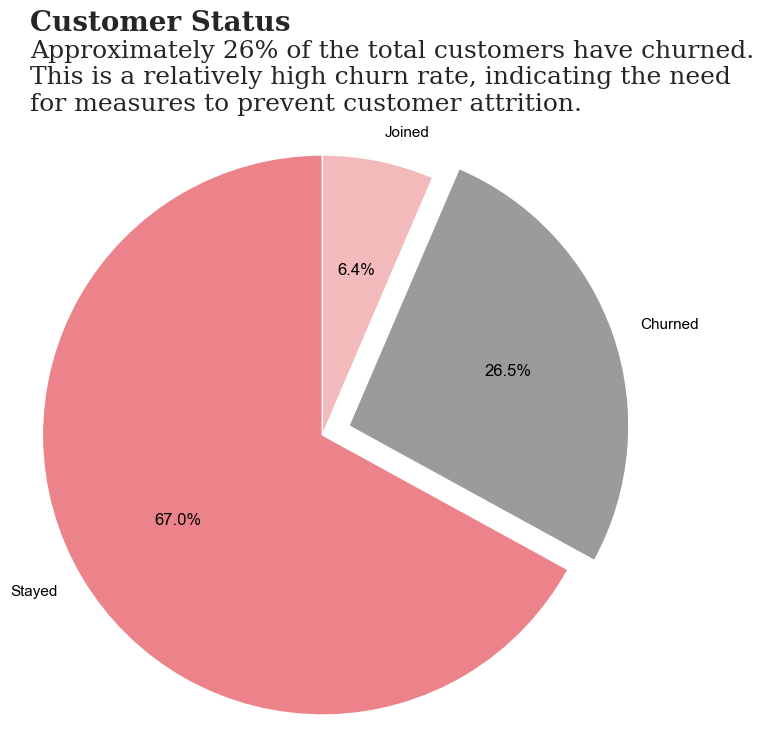

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

labels = customerRatio.index
sizes = customerRatio.values
explode = [0.1 if label == 'Churned' else 0 for label in labels]


fig.text(0.13, 1, 'Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.90, 
"Approximately 26% of the total customers have churned. \nThis is a relatively high churn rate, indicating the need \nfor measures to prevent customer attrition."
, fontsize=18, fontweight='light', fontfamily='serif')

ax.pie(sizes, labels=labels, autopct='%1.1f%%', # counterclock = False,
       startangle=90, textprops=dict(color="black"), explode=explode, colors= color)
ax.axis('equal')

plt.show()

전체 이탈률을 예비적으로 살펴보면 약 74%의 고객이 활성 상태임을 알 수 있습니다. 이것은 불균형 분류 문제입니다. 기계 학습 알고리즘은 각 클래스의 인스턴스 수가 거의 동일할 때 잘 작동합니다. 데이터 세트가 왜곡되어 있으므로 모델 선택을 위한 메트릭을 선택할 때 이 를 염두에 두어야 합니다.

### 3-2. 전체 고객의 월별 요금 확인

In [16]:
df.groupby('customer_status')['monthly_charge'].describe()

count       mean        std   min      25%     50%    75%  \
customer_status                                                               
Churned          1869.0  73.347592  26.373764 -10.0  55.3000  79.500  94.20   
Joined            454.0  42.775991  24.612329  -8.0  20.1625  43.975  64.35   
Stayed           4720.0  61.737415  32.198758 -10.0  25.1000  65.600  89.55   

                    max  
customer_status          
Churned          118.35  
Joined           107.95  
Stayed           118.75

In [17]:
median = df.groupby('customer_status')['monthly_charge'].median()
median

customer_status
Churned    79.500
Joined     43.975
Stayed     65.600
Name: monthly_charge, dtype: float64

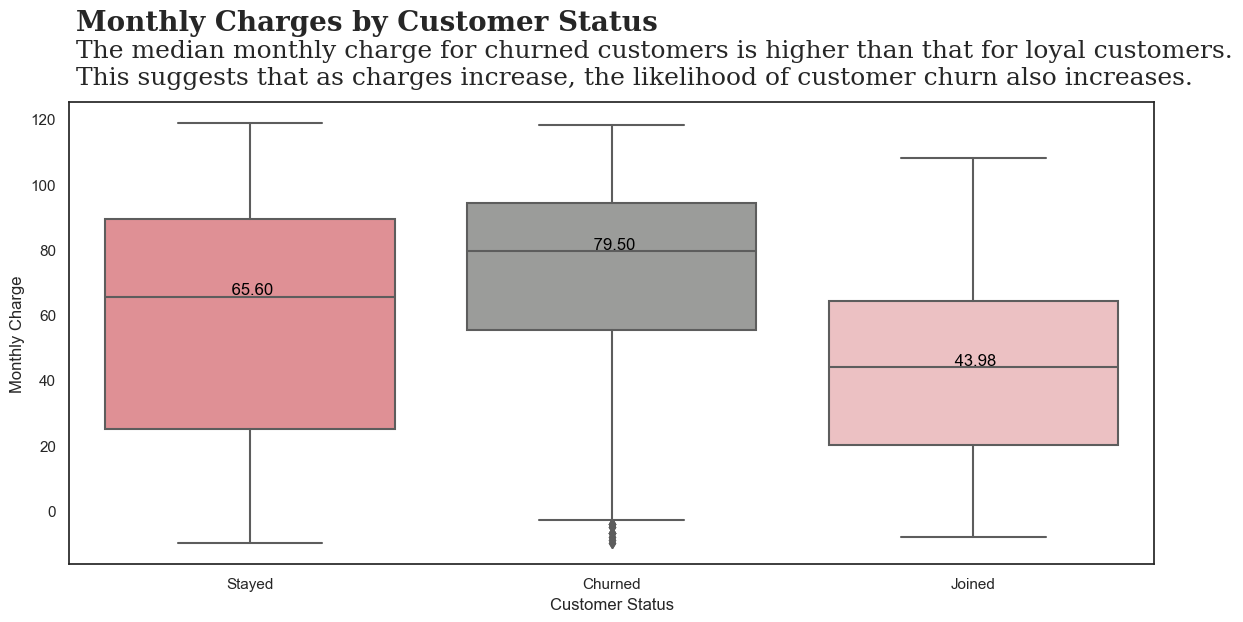

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Monthly Charges by Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
         "The median monthly charge for churned customers is higher than that for loyal customers.\nThis suggests that as charges increase, the likelihood of customer churn also increases."
         , fontsize=18, fontweight='light', fontfamily='serif')

box = sns.boxplot(data = df, x = 'customer_status', y = 'monthly_charge', palette=color)
order = box.get_xticklabels()
order = [label.get_text() for label in order]
median = median.reindex(order)

for status in median.index:
    val = median[status]
    x = list(median.index).index(status)
    plt.text(x = x, y = val+2, s = f'{val : .2f}', 
             ha = 'center', va = 'center', color = 'black', fontsize = 12
            )

plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.show()

고객 이탈 및 유지
1. **이탈 고객 비율**: 전체 고객의 약 26%가 이탈했습니다. 이는 비교적 높은 이탈율로, 회사는 이탈을 방지하기 위한 대책이 필요합니다.
2. **이탈 고객의 월별 요금**: 이탈 고객의 월별 요금 중앙값이 충성 고객의 월별 요금 중앙값보다 높습니다. 이는 요금이 높아질수록 고객이 이탈할 가능성이 높다는 것을 시사합니다.
3. **신규 가입 고객 비율**: 전체 고객의 약 6%가 신규 가입했습니다. 이는 이탈률에 비해 낮은 비율로, 신규 고객 유치를 위한 전략이 필요합니다.

고객 이탈로 인한 손실
- **고객 생애 가치 (CLV)**: 고객이 기업과 관계를 유지하는 동안 발생하는 총 매출
1. **이탈 고객 비율을 낮추는 전략**: 이탈 고객으로 인한 손실이 크다면, 이탈을 방지하기 위한 전략을 우선시하는 것이 효과적일 수 있습니다. 이를 위해 이탈 원인을 분석하고, 고객 생애 가치(CLV)를 높이는 방법을 모색해볼 수 있습니다.
2. **신규 가입 고객 비율을 높이는 전략**: 만약 신규 고객 유치 비용이 낮고, 신규 고객의 CLV가 높다면, 신규 가입 고객 비율을 높이는 전략도 고려할 수 있습니다.

### 3-3. 전체 매출과 이탈 고객으로 인한 손실

In [19]:
customerRevenue = df.groupby('customer_status')['total_charges'].sum()
totalRevenue = customerRevenue.sum()

churnLoss = customerRevenue['Churned'] / totalRevenue * 100

print(f"이탈 고객으로 인한 손실 비율: {churnLoss:.2f}%")
print(f"전체 매출: {totalRevenue:.2f}")
print(f"이탈 고객 매출: {customerRevenue['Churned']:.2f}")
print(f"신규 가입 고객 매출: {customerRevenue['Joined']:.2f}")
print(f"충성 고객 매출: {customerRevenue['Stayed']:.2f}")

이탈 고객으로 인한 손실 비율: 17.83%
전체 매출: 16060725.24
이탈 고객 매출: 2862926.90
신규 가입 고객 매출: 35998.90
충성 고객 매출: 13161799.44


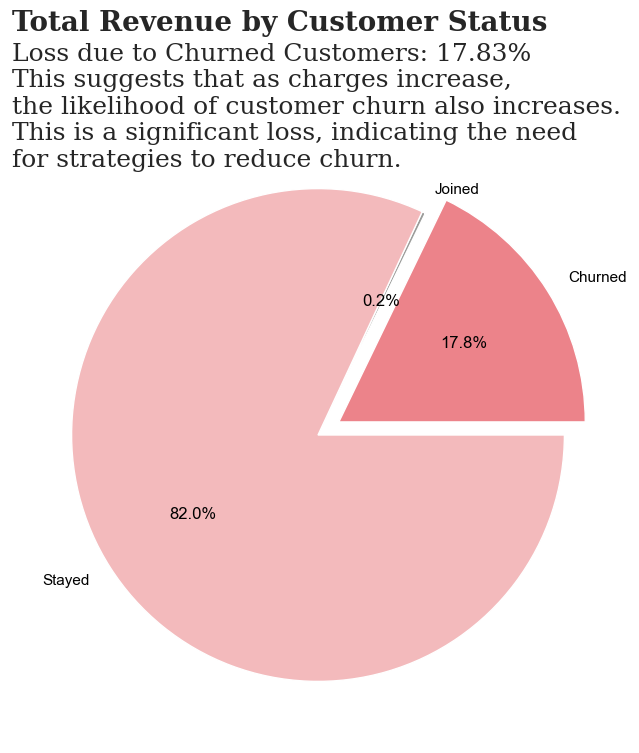

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

labels = customerRevenue.index
sizes = customerRevenue.values
explode = [0.1 if label == 'Churned' else 0 for label in labels]

fig.text(0.13, 1, 'Total Revenue by Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.83, 
         f'Loss due to Churned Customers: {churnLoss:.2f}% \nThis suggests that as charges increase, \nthe likelihood of customer churn also increases. \nThis is a significant loss, indicating the need \nfor strategies to reduce churn.'
         , fontsize=18, fontweight='light', fontfamily='serif')

ax.pie(sizes, labels=labels, autopct='%1.1f%%', # counterclock = False,
       startangle=0, textprops=dict(color="black"), explode=explode, colors= color)
plt.show()

### 3-4. 결론
이탈 고객으로 인해 회사는 전체 매출의 약 17%를 잃었습니다. 이탈 고객이 지불한 총 요금은 약 286만 달러로, 이들 고객을 유지했을 때 회사의 수익에 크게 기여할 수 있었을 것입니다. 이는 상당한 손실이며, 이탈을 줄이기 위한 대책이 필요합니다. 뿐만 아니라, 신규 고객 유치 비용이 이탈을 줄이는 비용보다 많이 들고, 신규 고객의 CLV가 유의미하게 높지 않기에 이탈 원인을 분석하고 CLV를 높이는 방법을 모색하여 이탈 고객 비율을 낮추는 전략을 고려해야 합니다.
- 신규 고객 + 유지 고객, 이탈 고객으로 목적 변수 변경

In [21]:
df['churn'] = np.where(df['customer_status'] == 'Churned', 1, 0)
df = df.drop(columns=['customer_status'])
df.head()

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  ...   payment_method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  monthly_charge total_charges  total_refunds total_extra_data_charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  total_long_distance_charges total_revenue   churn_category  \
0                      381.51        974.81              NaN   
1                       96.21        610.28              NaN   
2                      134.60        415.45       Competitor   
3                      361.66       1599.51  Dissatisfaction   
4                       22.14        289.54  Dissatisfaction   

                    churn_reason churn  
0                            NaN     0  
1                            NaN     0  
2  Competitor had better devices     1  
3        Product dissatisfaction     1  
4            Network reliability     1  

[5 rows x 38 columns]

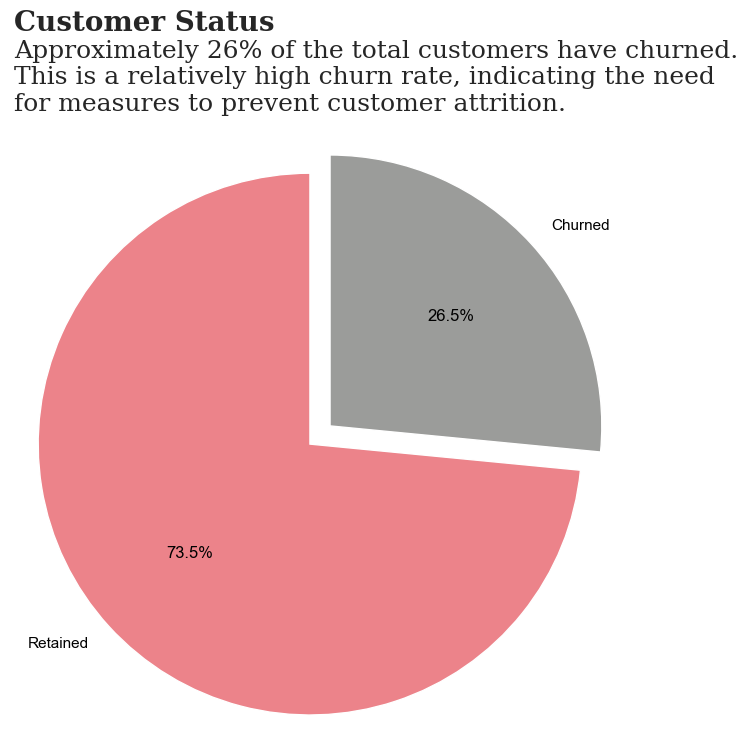

In [22]:
customer = df['churn'].value_counts()
customerRatio = customer / df.shape[0] * 100

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

labels = customerRatio.index
sizes = customerRatio.values
explode = [0.1 if label == 1 else 0 for label in labels]


fig.text(0.13, 1, 'Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.90, 
"Approximately 26% of the total customers have churned. \nThis is a relatively high churn rate, indicating the need \nfor measures to prevent customer attrition."
, fontsize=18, fontweight='light', fontfamily='serif')

ax.pie(customerRatio, labels=['Retained', 'Churned'], autopct='%1.1f%%', # counterclock = False,
       startangle=90, textprops=dict(color="black"), explode=explode, colors= color)
ax.axis('equal')

plt.show()

## 4. 데이터세트 클리닝

## 5. 누락 데이터 관리 및 재검증

In [23]:
df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                   0
phone_service                           0
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_service                        0
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                  

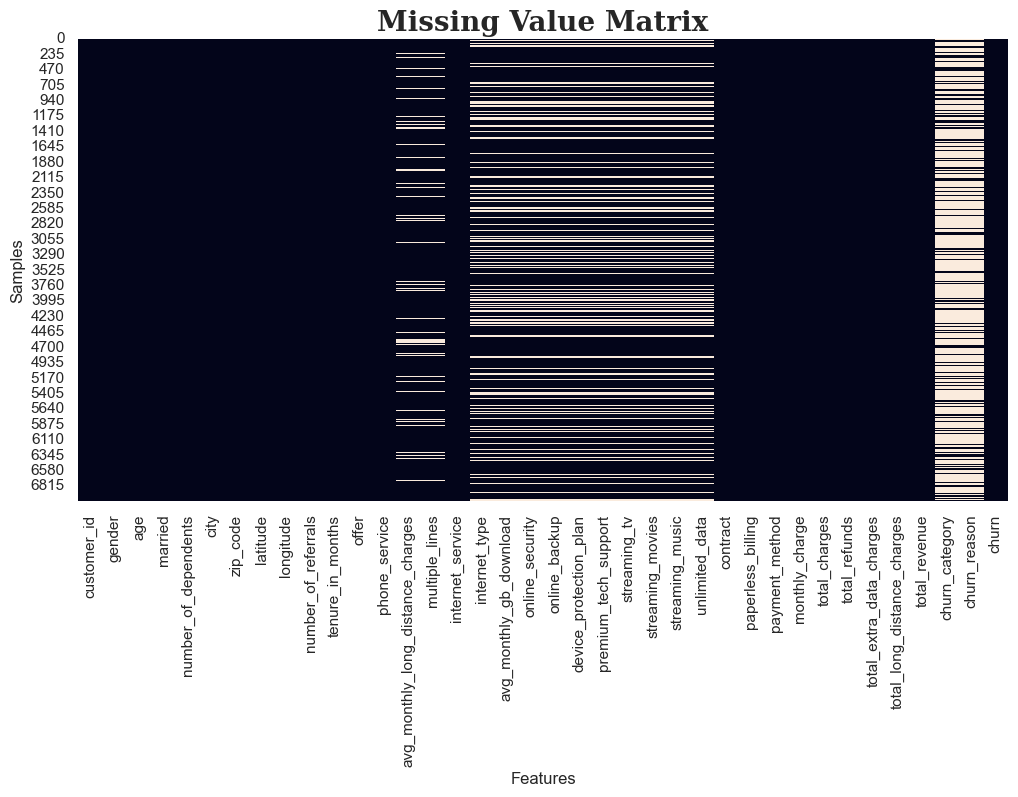

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False) #, cmap='viridis')
plt.title('Missing Value Matrix', fontfamily = 'serif', fontweight = 'bold', fontsize = 20)
plt.xlabel('Features')
plt.ylabel('Samples')
# plt.xticks(rotation = 45)
plt.show()

In [25]:
df['avg_monthly_long_distance_charges'] = df['avg_monthly_long_distance_charges'].fillna(round(df['avg_monthly_long_distance_charges'].mean()))
df.multiple_lines = df.multiple_lines.fillna('No Phone Service')

no_internet_service = ['internet_type', 'online_security', 'online_backup', 'device_protection_plan','premium_tech_support',
                       'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']
df[no_internet_service] = df[no_internet_service].fillna('No Internet Service')
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(round(df['avg_monthly_gb_download'].mean()))

In [26]:
df.isna().any()

customer_id                          False
gender                               False
age                                  False
married                              False
number_of_dependents                 False
city                                 False
zip_code                             False
latitude                             False
longitude                            False
number_of_referrals                  False
tenure_in_months                     False
offer                                False
phone_service                        False
avg_monthly_long_distance_charges    False
multiple_lines                       False
internet_service                     False
internet_type                        False
avg_monthly_gb_download              False
online_security                      False
online_backup                        False
device_protection_plan               False
premium_tech_support                 False
streaming_tv                         False
streaming_m

In [27]:
# naCol = df.isna().any()
# naCol = naCol[naCol == True].reset_index()
# noCol = naCol['index'].tolist()
# for col in df.columns[:1]:
#     if col in naCol:
#         if df[col]dtype != 'object':
#             df[col] = df[col].fillna(df[col].mean()).round(0)

## 6. 고유값이 2개이하인 데이터 라벨 인코딩

In [28]:
# 고유값 식별
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}의 고유값 개수 : {df[col].nunique()}')

customer_id의 고유값 개수 : 7043
gender의 고유값 개수 : 2
married의 고유값 개수 : 2
city의 고유값 개수 : 1106
offer의 고유값 개수 : 6
phone_service의 고유값 개수 : 2
multiple_lines의 고유값 개수 : 3
internet_service의 고유값 개수 : 2
internet_type의 고유값 개수 : 4
online_security의 고유값 개수 : 3
online_backup의 고유값 개수 : 3
device_protection_plan의 고유값 개수 : 3
premium_tech_support의 고유값 개수 : 3
streaming_tv의 고유값 개수 : 3
streaming_movies의 고유값 개수 : 3
streaming_music의 고유값 개수 : 3
unlimited_data의 고유값 개수 : 3
contract의 고유값 개수 : 3
paperless_billing의 고유값 개수 : 2
payment_method의 고유값 개수 : 3
churn_category의 고유값 개수 : 5
churn_reason의 고유값 개수 : 20


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            print(f'{col} was label encoded.')
print(f'{le_count} columns were label encoded.')

gender was label encoded.
married was label encoded.
phone_service was label encoded.
internet_service was label encoded.
paperless_billing was label encoded.
5 columns were label encoded.


In [30]:
# print(encoder.inverse_transform(df["payment_method"]))

In [31]:
df.head()

customer_id  gender  age  married  number_of_dependents          city  \
0  0002-ORFBO       0   37        1                     0  Frazier Park   
1  0003-MKNFE       1   46        0                     0      Glendale   
2  0004-TLHLJ       1   50        0                     0    Costa Mesa   
3  0011-IGKFF       1   78        1                     0      Martinez   
4  0013-EXCHZ       0   75        1                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  ...   payment_method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  monthly_charge  total_charges  total_refunds total_extra_data_charges  \
0           65.6         593.30           0.00                        0   
1           -4.0         542.40          38.33                       10   
2           73.9         280.85           0.00                        0   
3           98.0        1237.85           0.00                        0   
4           83.9         267.40           0.00                        0   

   total_long_distance_charges total_revenue   churn_category  \
0                       381.51        974.81              NaN   
1                        96.21        610.28              NaN   
2                       134.60        415.45       Competitor   
3                       361.66       1599.51  Dissatisfaction   
4                        22.14        289.54  Dissatisfaction   

                    churn_reason churn  
0                            NaN     0  
1                            NaN     0  
2  Competitor had better devices     1  
3        Product dissatisfaction     1  
4            Network reliability     1  

[5 rows x 38 columns]

# B.데이터 평가 (EDA)

In [32]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['gender', 'age', 'married', 'number_of_dependents', 'zip_code', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'internet_service', 'paperless_billing', 'total_extra_data_charges', 'churn'], float64: ['latitude', 'longitude', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_long_distance_charges', 'total_revenue'], object: ['customer_id', 'city', 'offer', 'multiple_lines', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'payment_method', 'churn_category', 'churn_reason']}

## 8-1. 숫자형 변수 히스토그램

In [33]:
numIdx = []
for col in df.columns:
    if df[col].dtype != 'object':
        numIdx.append(col)
print(numIdx)

numDF = df[numIdx]
numDF.head()

['gender', 'age', 'married', 'number_of_dependents', 'zip_code', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'avg_monthly_long_distance_charges', 'internet_service', 'avg_monthly_gb_download', 'paperless_billing', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'churn']


gender  age  married  number_of_dependents  zip_code   latitude  \
0       0   37        1                     0     93225  34.827662   
1       1   46        0                     0     91206  34.162515   
2       1   50        0                     0     92627  33.645672   
3       1   78        1                     0     94553  38.014457   
4       0   75        1                     0     93010  34.227846   

    longitude  number_of_referrals  tenure_in_months  phone_service  ...  \
0 -118.999073                    2                 9              1  ...   
1 -118.203869                    0                 9              1  ...   
2 -117.922613                    0                 4              1  ...   
3 -122.115432                    1                13              1  ...   
4 -119.079903                    3                 3              1  ...   

   internet_service  avg_monthly_gb_download  paperless_billing  \
0                 1                     16.0                  1   
1                 1                     10.0                  0   
2                 1                     30.0                  1   
3                 1                      4.0                  1   
4                 1                     11.0                  1   

   monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
0            65.6         593.30           0.00                         0   
1            -4.0         542.40          38.33                        10   
2            73.9         280.85           0.00                         0   
3            98.0        1237.85           0.00                         0   
4            83.9         267.40           0.00                         0   

   total_long_distance_charges  total_revenue  churn  
0                       381.51         974.81      0  
1                        96.21         610.28      0  
2                       134.60         415.45      1  
3                       361.66        1599.51      1  
4                        22.14         289.54      1  

[5 rows x 21 columns]

In [34]:
# numDf = df[['gender', 'age', 'married', 'number_of_dependents',
#            'tenure_in_months', 'offer', 'phone_service',
#            'internet_service', 'contract', 'paperless_billing',
#             'payment_method', 'monthly_charge', 'total_charges']]

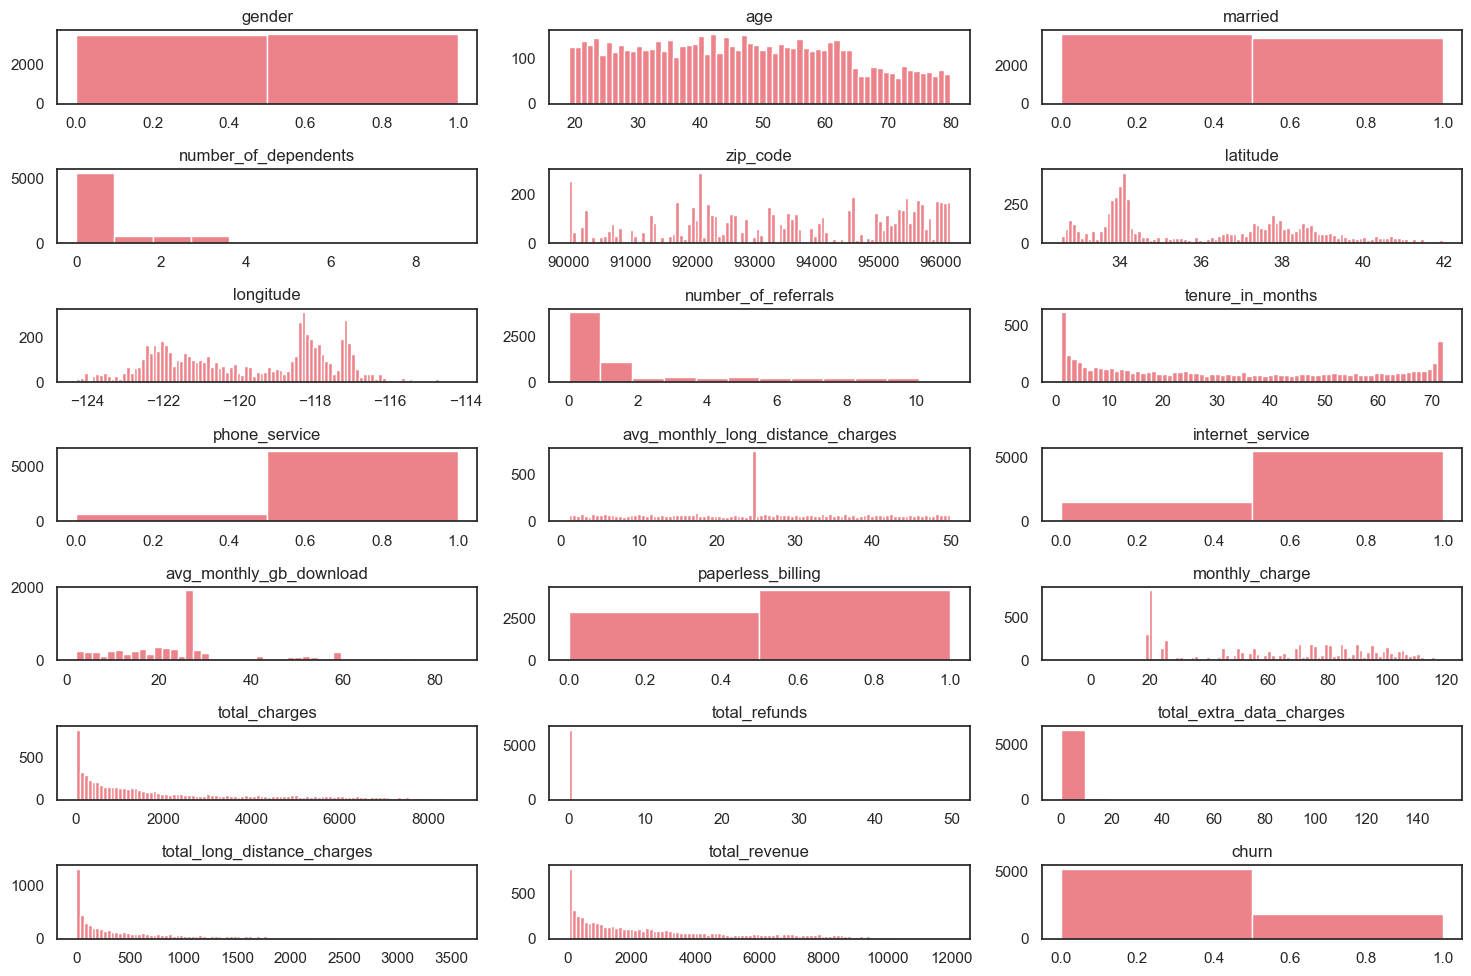

In [35]:
fig = plt.figure(figsize = (15,12))
plt.title("Histograms of Numerical Columns")
for i in range(numDF.shape[1]):
    plt.subplot(8, 3, i+1)
    ax = plt.gca()
    ax.set_title(numDF.columns.values[i])
    
    # 고유값 개수만큼 막대바 설정해주기 + 고유값이 100개 이상이면 100으로 binning
    vals = np.size(numDF.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(numDF.iloc[:, i], bins = vals, color = color[0])

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- **성별 분포**: 남성과 여성 고객의 상대적으로 동일한 비율 특성
- **나이 분포**: 대부분의 고객이 젊은 고객층 (Senior 고객층 65세 이상의 고객이 상대적으로 적음)
- **기혼 분포**: 거의 절반이 파트너가 있는 반면, 부양 가족이 없는 고객이 많음
- **고객 분포**: 10개월 이하의 신규 고객이 많고, 그 다음은 평균 70개월 이상 유지되는 충성 고객 존재
- **서비스 분포**: 대다수의 고객의 전화 서비스를 사용하고, 그 중 3/4는 종이 없는 청구를 선택함. 절반 이상의 고객이 월 계약 선택함.
- 월별 요금은 약 20달러 - 120달러 사이로, 평균적으로 20달러 세그먼트에 있음.

In [36]:
df['senior'] = df['age'].apply(lambda x: 1 if x >= 65 else 0)

### 1. 주소지

In [37]:
df.groupby('zip_code')['total_long_distance_charges'].describe()

count       mean         std     min       25%       50%        75%  \
zip_code                                                                        
90001       4.0   327.9925  628.505525    0.00    0.0000    20.840   348.8325   
90002       4.0  1014.7350  562.478014  581.06  602.7350   846.700  1258.7000   
90003       5.0   230.1620  412.218495   20.94   43.5700    57.540    61.7500   
90004       5.0   325.9780  448.154537    0.00    3.0900   133.380   429.1200   
90005       4.0   449.3675  445.533807   18.24  104.3325   416.615   761.6500   
...         ...        ...         ...     ...       ...       ...        ...   
96143       4.0   555.5375  547.571228   87.24   99.2100   479.055   935.3825   
96145       3.0  1199.0900  962.750386  309.96  687.8550  1065.750  1643.6550   
96146       4.0   534.4650  559.159660   45.12   57.5850   499.470   976.3500   
96148       4.0   292.8275  304.428582   35.37   43.1925   241.270   490.9050   
96150       2.0   144.2500  202.402245    1.13   72.6900   144.250   215.8100   

              max  
zip_code           
90001     1270.29  
90002     1784.48  
90003      967.01  
90004     1064.30  
90005      946.00  
...           ...  
96143     1176.80  
96145     2221.56  
96146     1093.80  
96148      653.40  
96150      287.37  

[1626 rows x 8 columns]

In [38]:
df.groupby('zip_code').size()

zip_code
90001    4
90002    4
90003    5
90004    5
90005    4
        ..
96143    4
96145    3
96146    4
96148    4
96150    2
Length: 1626, dtype: int64

In [39]:
df.groupby('zip_code').size().max()

43

In [40]:
df.groupby('zip_code').size().mean()

4.331488314883149

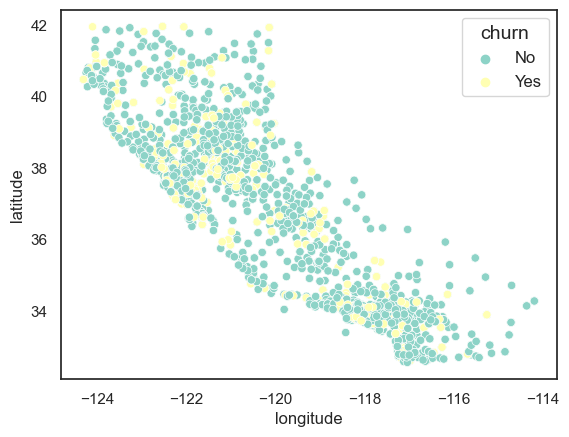

In [41]:
ax = sns.scatterplot(data = df, x='longitude', y='latitude', hue='churn', palette = 'Set3')
# plt.legend(['No', 'Yes'], title='churn', fontsize=12, title_fontsize=14)

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes'] if labels == ['0', '1'] else labels
ax.legend(handles=handles, labels=labels, title='churn', fontsize=12, title_fontsize=14)


한 우편번호 당 최대 43명이 살고 있는 구역도 있지만 각 우편번호 당 평균 4.5명의 고객이 살고 있다. 지역별로 보았을 때 한 곳에 이탈고객이 몰려있거나 하는 특징은 없다.

In [42]:
df = df.drop(columns = ['city', 'zip_code', 'latitude', 'longitude'])
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn_category', 'churn_reason', 'churn', 'senior'],
      dtype='object')

In [43]:
numIdx = []
for col in df.columns:
    if df[col].dtype != 'object':
        numIdx.append(col)
print(numIdx)

['gender', 'age', 'married', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'avg_monthly_long_distance_charges', 'internet_service', 'avg_monthly_gb_download', 'paperless_billing', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'churn', 'senior']


## 8-2. 범주형 변수 히스토그램

In [44]:
catIdx = df.columns.difference(numIdx)
catIdx = list(catIdx)

# catIdx.append('gender')
# catIdx.append('married')
# catIdx.append('phone_service')
# catIdx.append('internet_service')
# catIdx.append('senior')
# catIdx.append('churn')

print(catIdx)

['churn_category', 'churn_reason', 'contract', 'customer_id', 'device_protection_plan', 'internet_type', 'multiple_lines', 'offer', 'online_backup', 'online_security', 'payment_method', 'premium_tech_support', 'streaming_movies', 'streaming_music', 'streaming_tv', 'unlimited_data']


In [45]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['gender', 'age', 'married', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'internet_service', 'paperless_billing', 'total_extra_data_charges', 'churn', 'senior'], float64: ['avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_long_distance_charges', 'total_revenue'], object: ['customer_id', 'offer', 'multiple_lines', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'payment_method', 'churn_category', 'churn_reason']}

### 1. 이탈 원인 분석

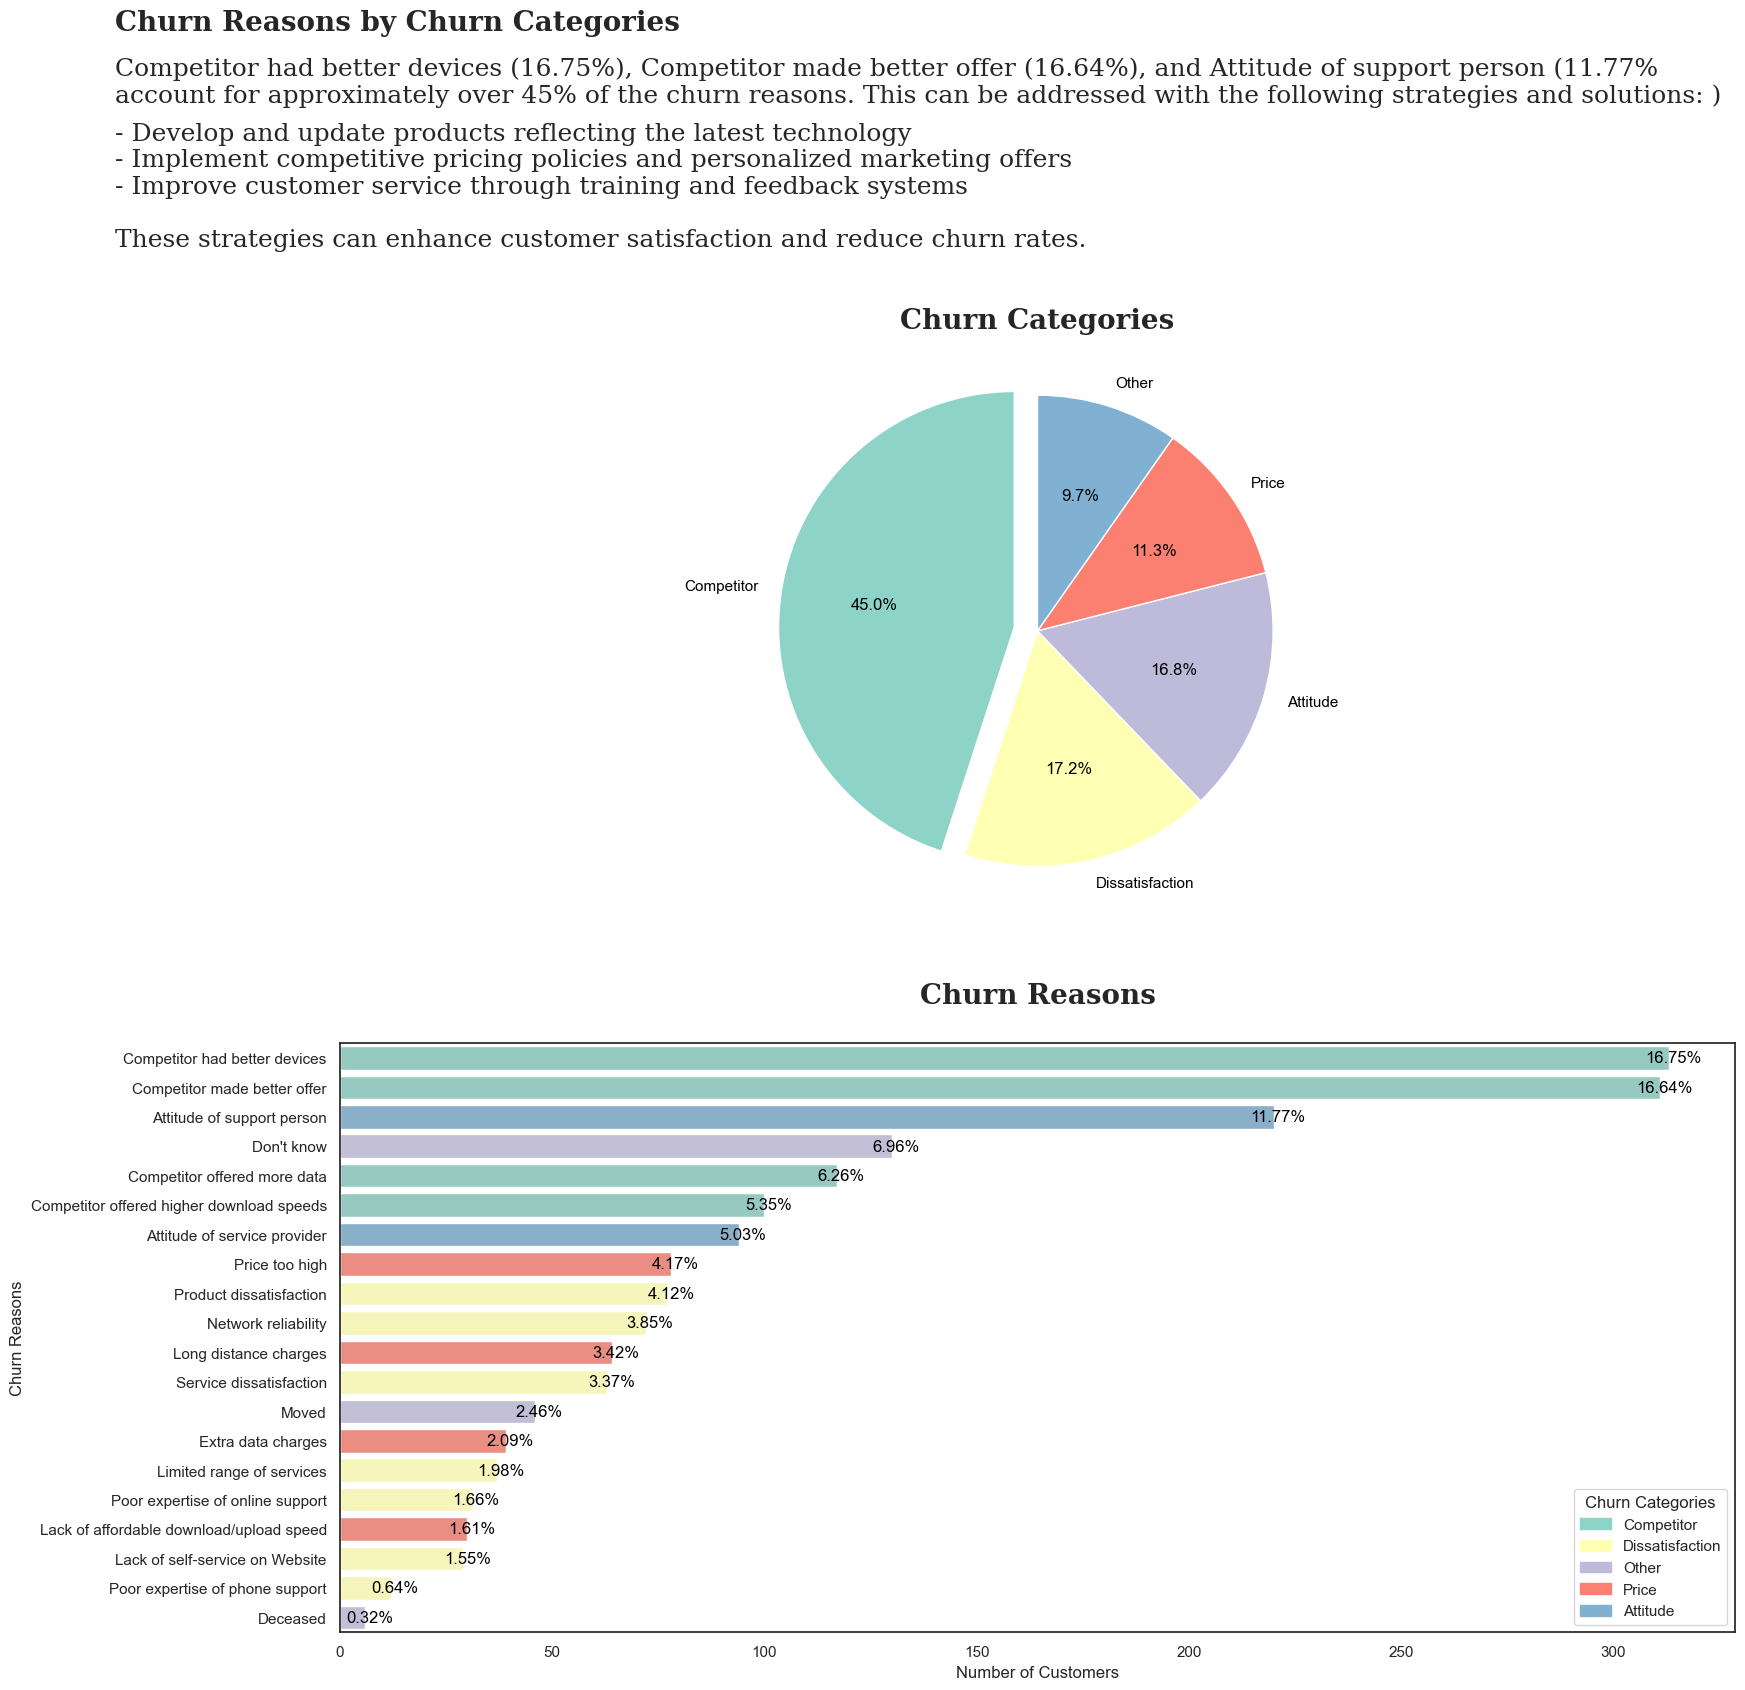

In [46]:
# ax1
churnCategory = df[df['churn'] == 1]['churn_category'].value_counts()

# ax2
churnReason = df[df['churn'] == 1]['churn_reason'].dropna().value_counts()
reasonRatio = churnReason / churnReason.sum() * 100
top3 = reasonRatio.head(3)

# 이탈 원인별 카테고리 매핑
reaCatMapping = df[df['churn'] == 1][['churn_reason', 'churn_category']].dropna().drop_duplicates().set_index('churn_reason').to_dict()['churn_category']

# 이탈 원인에 대한 카테고리 컬러 설정
palette = sns.color_palette('Set3', n_colors=len(df['churn_category'].dropna().unique()))
colorMapping = {category: color for category, color in zip(df['churn_category'].dropna().unique(), palette)}
colors = [colorMapping[reaCatMapping[reason]] for reason in churnReason.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,18))

fig.text(0.00, 1, 'Churn Reasons by Churn Categories', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.00, 0.96, 
         f'{top3.index[0]} ({top3.values[0]:.2f}%), {top3.index[1]} ({top3.values[1]:.2f}%), and {top3.index[2]} ({top3.values[2]:.2f}% \naccount for approximately over {int(sum(top3.values))}% of the churn reasons. This can be addressed with the following strategies and solutions: )'
         , fontsize=18, fontweight='light', fontfamily='serif')
fig.text(0.00, 0.88, 
         "\n- Develop and update products reflecting the latest technology \n- Implement competitive pricing policies and personalized marketing offers \n- Improve customer service through training and feedback systems \n\nThese strategies can enhance customer satisfaction and reduce churn rates."
         , fontsize=18, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


# ax1
explode = [0.1 if category == 'Competitor' else 0 for category in churnCategory.index]
wedges, texts, autotexts = ax1.pie(churnCategory, labels = churnCategory.index,
                                  autopct = '%1.1f%%', startangle = 90, explode = explode,
                                  colors = palette,
                                  textprops = dict(color = 'black'))
ax1.set_title('Churn Categories', fontsize = 20, fontweight = 'bold', fontfamily = 'serif')


#ax2
ax2 = sns.barplot(y=churnReason.index, x=churnReason.values, palette=colors)
for i, (count, percent) in enumerate(zip(churnReason, reasonRatio)):
    plt.text(count + 1, i, f'{percent:.2f}%', ha='center', va='center', fontsize=12, color='black')
ax2.set_title('Churn Reasons\n', fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
ax2.set_xlabel('Number of Customers')
ax2.set_ylabel('Churn Reasons')

# 범례 추가
handles = [plt.Rectangle((0,0),1,1, color=colorMapping[category]) for category in colorMapping]
labels = list(colorMapping.keys())
plt.legend(handles, labels, title="Churn Categories", loc='lower right'), # bbox_to_anchor=(1.05, 1))

plt.show()

- 이탈의 45% 이유가 경쟁업체로의 이동이 있습니다. 이외 불만족, 또는 서비스 태도 문제가 이탈 원인의 약 32%를 차지합니다.
    - 전체 원인 중 경쟁사의 더 나은 디바이스와 마케팅 제안이 약 34%를 차지합니다. 
        - 경쟁사는 더 나은 기술과 기능을 제공하고 있으며, 매력적인 가격과 혜택, 서비스 조건을 제시하여 고객을 유치하고 있습니다. 아래의 전략을 통해 고객 만족도를 높이고 이탈율을 감소시킬 수 있을 것입니다.
            - 최신 기술을 반영한 제품 개발 및 업데이트
            - 파트너십을 통한 다양한 제품 및 기기 제공
            - 경쟁력 있는 가격 정책과 맞춤형 마케팅 제안
            - 충성 고객을 위한 특별 혜택 및 보상을 포함하는 로열티 프로그램 기획
    - 전체 원인 중 약 11%에 해당하는 고객이 서비스 담당자의 불친절한 태도나 비효율적인 문제 해결로 인한 불만을 느끼고 가입을 철회합니다. 이탈 감소를 위해 아래의 전략을 고려해볼 수 있습니다.
        - 고객 서비스 개선을 위한 교육 및 피드백 시스템 도입

In [47]:
df = df.drop(columns = ['churn_category', 'churn_reason'])
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn', 'senior'],
      dtype='object')

### 2. 계약 유지 기간

In [48]:
tenure = df['tenure_in_months'].value_counts()
df['tenure_in_years'] = df['tenure_in_months'] // 12 * 12

mapping = {0: 1, 12: 2, 24: 3, 36: 4, 48: 5, 60: 6, 72: 7}
df['tenure_in_years'] = df['tenure_in_years'].map(mapping)

tenureYear = df['tenure_in_years'].value_counts().sort_index()
tenureYear

1    2069
2    1047
3     876
4     748
5     820
6    1121
7     362
Name: tenure_in_years, dtype: int64

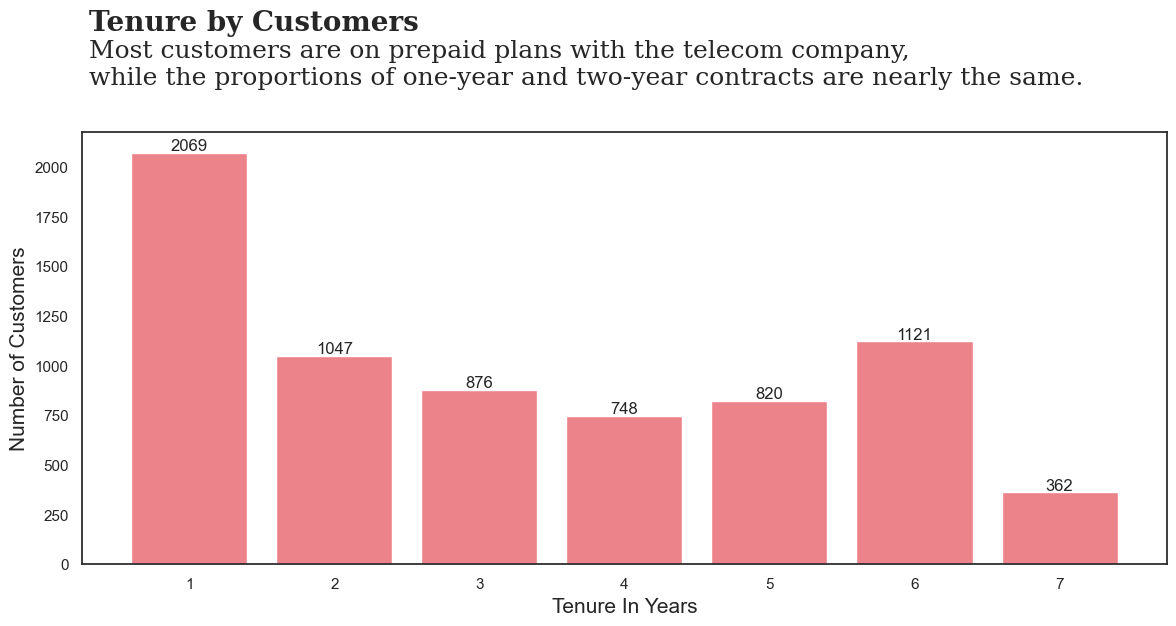

In [49]:
tenure = df['tenure_in_months'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Tenure by Customers', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Most customers are on prepaid plans with the telecom company, \nwhile the proportions of one-year and two-year contracts are nearly the same."
, fontsize=18, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)

bars = ax.bar(tenureYear.index.astype(str), tenureYear.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Tenure In Years', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

### 3. 계약 유형

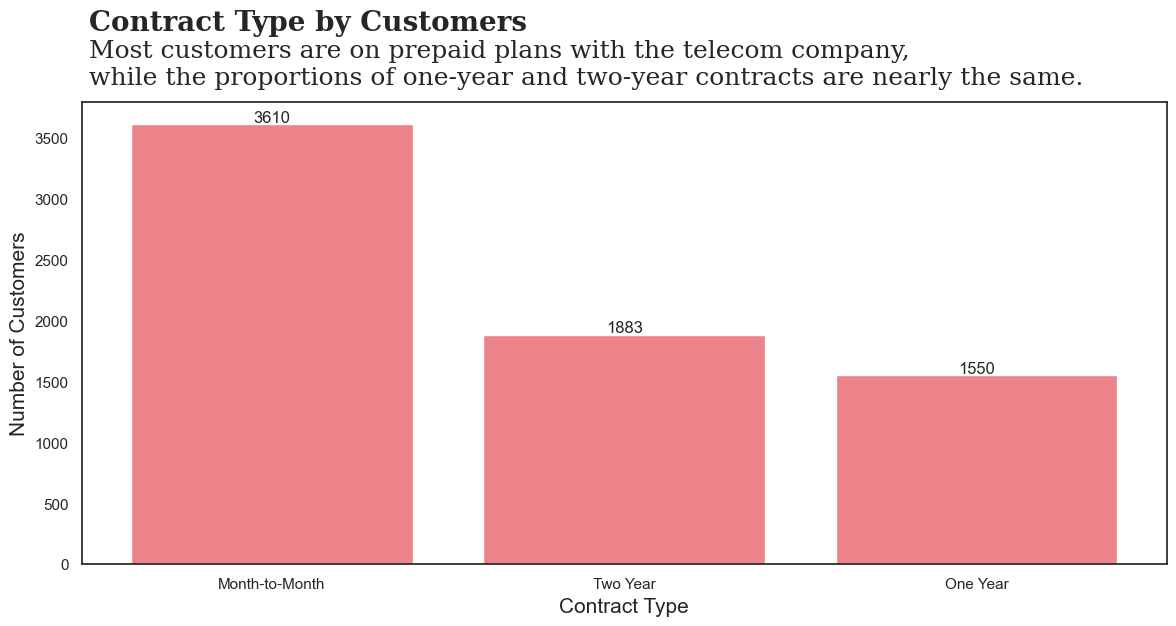

In [50]:
contract = df['contract'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Contract Type by Customers', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Most customers are on prepaid plans with the telecom company, \nwhile the proportions of one-year and two-year contracts are nearly the same."
, fontsize=18, fontweight='light', fontfamily='serif')

bars = ax.bar(contract.index, contract.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Contract Type', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

대부분의 고객은 통신사와 선불 연결을 하고 있는 반면, 1년 계약과 2년 계약 고객 비율은 거의 같습니다.

### 4. 결제 방식

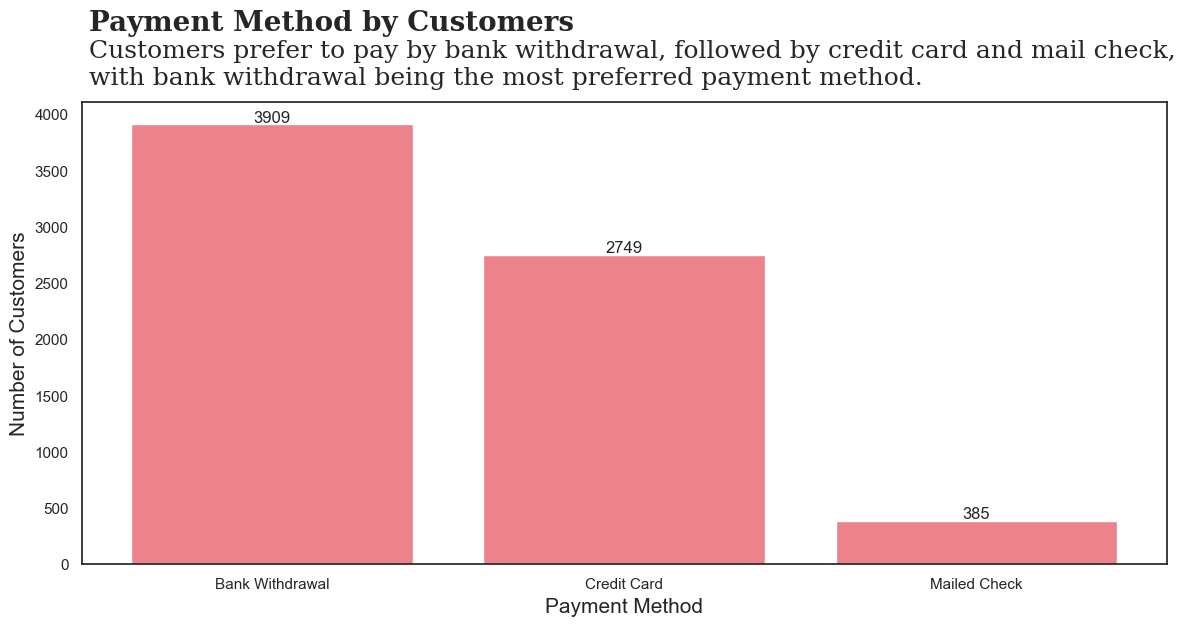

In [51]:
payment = df['payment_method'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Payment Method by Customers', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Customers prefer to pay by bank withdrawal, followed by credit card and mail check, \nwith bank withdrawal being the most preferred payment method."
, fontsize=18, fontweight='light', fontfamily='serif')

bars = ax.bar(payment.index, payment.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Payment Method', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

데이터 세트에 따르면 고객은 은행 송금, 신용 카드 및 메일 수표 순의 지불을 선호하며 가장 선호하는 것은 은행 송금으로 지불하는 것을 말해 주고 있습니다.

### 5. 마케팅

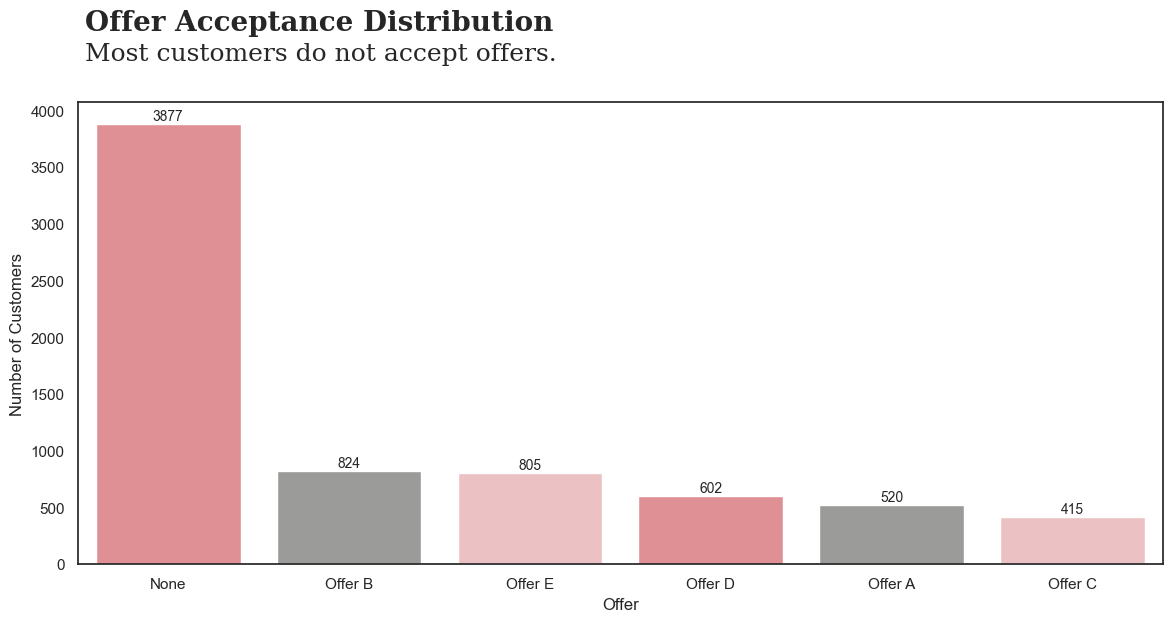

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (14,6))

fig.text(0.13, 1, 'Offer Acceptance Distribution', fontfamily = 'serif', fontweight = 'bold', fontsize = 20)
fig.text(0.13, 0.95, 
         "Most customers do not accept offers."
         , fontsize=18, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.90)



ax = sns.barplot(x = df['offer'].value_counts().index, y = df['offer'].value_counts().values, palette = color)
for i, count in enumerate(df['offer'].value_counts().values):
    ax.text(i, count + 5, str(count), ha='center', va = 'bottom', fontsize = 10)

plt.xlabel('Offer')
plt.ylabel('Number of Customers')
plt.show()

### 6. 서비스

In [53]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn', 'senior', 'tenure_in_years'],
      dtype='object')

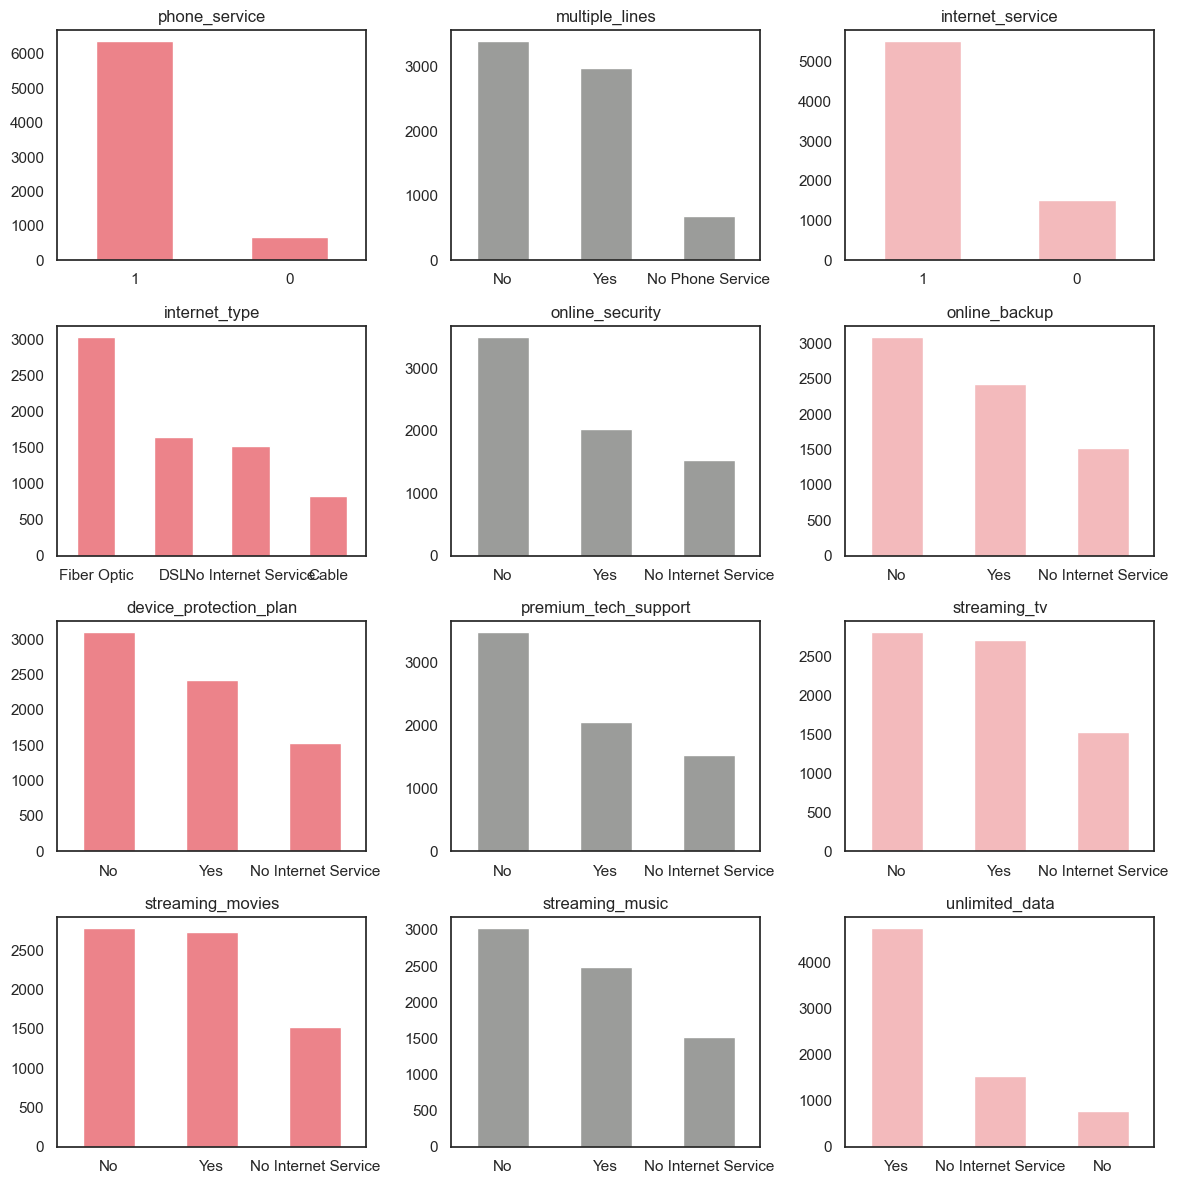

In [54]:
service = df[['phone_service', 'multiple_lines',
       'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data']]
service.head()

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (12,12))
for i, item in enumerate(service):
    ax = axes[i // 3, i % 3]
    df[item].value_counts().plot(kind='bar', ax=ax, rot=0, color=color[i % len(color)])
    ax.set_title(item)

plt.tight_layout()
plt.show()

- Most customers use phone service, with nearly half of them using multiple lines.
- Three-quarters of customers choose internet services through Fiber Optic and DSL connections. Nearly half of internet users subscribe to streaming TV, movie, and music services, and most people use unlimited data.
- Only a small number of customers use online backup, device protection, technical support, and online security features.

- 대부분의 고객은 전화 서비스를 이용하고 있으며 그 중 거의 절반이 여러 회선을 사용합니다.
- 고객의 3/4은 Fiber Optic 및 DSL 연결을 통한 인터넷 서비스를 선택했으며 인터넷 사용자의 거의 절반이 스트리밍 TV, 영화, 음악 서비스에 가입했고, 대부분의 사람이 무제한 데이터를 이용하고 있습니다.
- 온라인 백업, 장치 보호, 기술 지원 및 온라인 보안 기능을 사용한 고객은 소수입니다.

## 8-3. 이탈률 분석

### 1. 계약 유지 기간별 이탈률

In [55]:
tenure = df.groupby(['tenure_in_years', 'churn']).size().unstack()
tenure.rename(columns = {0: 'Retained', 1: 'Churned'}, inplace = True)

tenureAll = tenure.sum(axis = 1)
tenureRatio = tenure.div(tenureAll, axis = 0)
print(tenureAll) ; print(tenureRatio)

tenure_in_years
1    2069
2    1047
3     876
4     748
5     820
6    1121
7     362
dtype: int64
churn            Retained   Churned
tenure_in_years                    
1                0.517158  0.482842
2                0.704871  0.295129
3                0.779680  0.220320
4                0.804813  0.195187
5                0.850000  0.150000
6                0.917038  0.082962
7                0.983425  0.016575


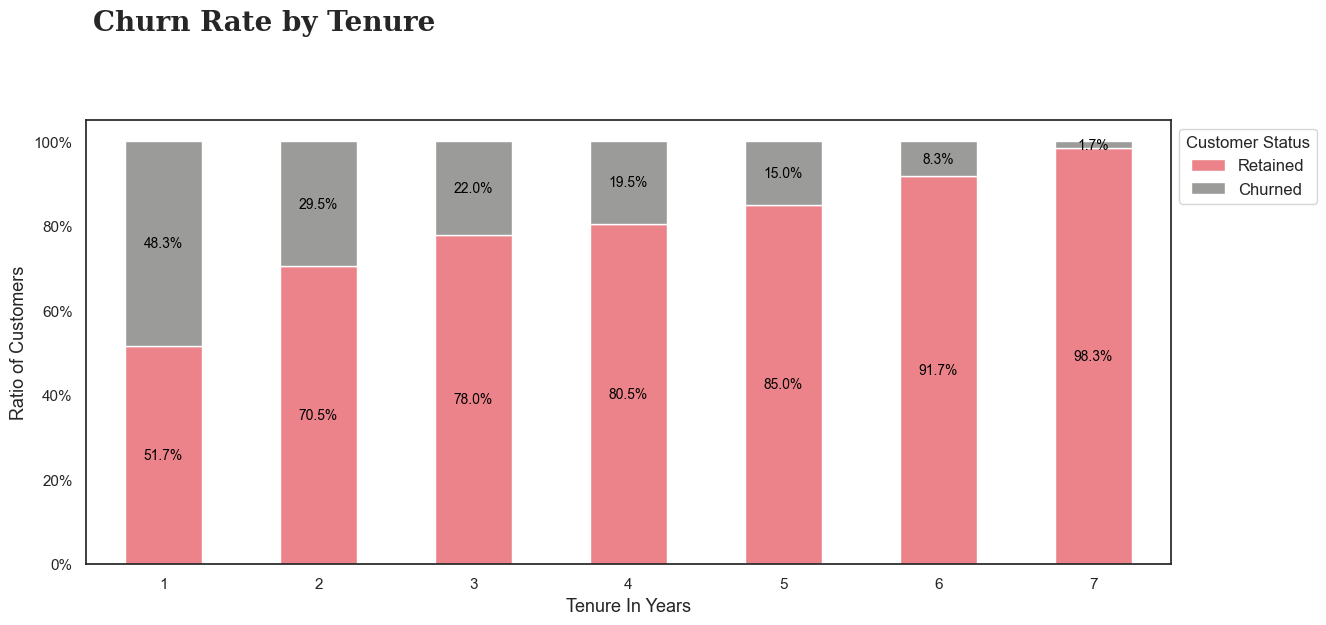

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Rate by Tenure', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
         ""
         , fontsize=18, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.85)


tenureRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color[:2])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Tenure In Years', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
plt.legend(title='Customer Status', fontsize=12, bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

### 2. 계약 유형별 이탈률

In [57]:
contract = df.groupby(['contract', 'churn']).size().unstack()
contract.rename(columns = {0: 'Retained', 1: 'Churned'}, inplace = True)

contract

churn           Retained  Churned
contract                         
Month-to-Month      1955     1655
One Year            1384      166
Two Year            1835       48

In [58]:
allContract = contract.sum(axis=1)
contractRatio = contract.div(allContract, axis=0)
print(allContract) ; print(contractRatio)

contract
Month-to-Month    3610
One Year          1550
Two Year          1883
dtype: int64
churn           Retained   Churned
contract                          
Month-to-Month  0.541551  0.458449
One Year        0.892903  0.107097
Two Year        0.974509  0.025491


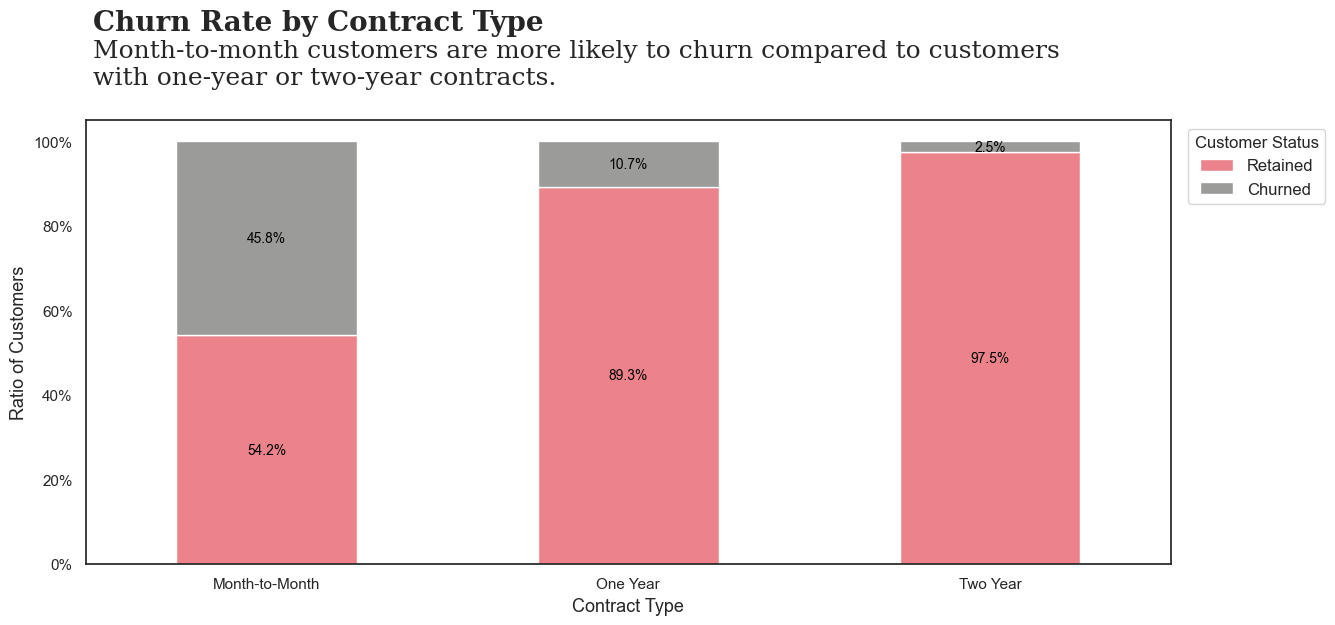

In [59]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Rate by Contract Type', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
         "Month-to-month customers are more likely to churn compared to customers \nwith one-year or two-year contracts."
         , fontsize=18, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.85)


contractRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color[:2])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Contract Type', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title='Customer Status', fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0)
plt.show()

월 단위 연결 고객은 1년 계약 또는 2년 계약 고객에 비해 이탈할 확률이 높습니다.

### 3. 결제 유형별 이탈률

In [60]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn', 'senior', 'tenure_in_years'],
      dtype='object')

In [61]:
paymentChurn = df.groupby(['contract', 'payment_method']).size().unstack()
paymentChurn

payment_method  Bank Withdrawal  Credit Card  Mailed Check
contract                                                  
Month-to-Month             2240         1136           234
One Year                    797          671            82
Two Year                    872          942            69

In [62]:
allPayment = paymentChurn.sum(axis=1)
paymentRatio = paymentChurn.div(allPayment, axis=0)
print(allPayment) ; print(paymentRatio)

contract
Month-to-Month    3610
One Year          1550
Two Year          1883
dtype: int64
payment_method  Bank Withdrawal  Credit Card  Mailed Check
contract                                                  
Month-to-Month         0.620499     0.314681      0.064820
One Year               0.514194     0.432903      0.052903
Two Year               0.463091     0.500266      0.036644


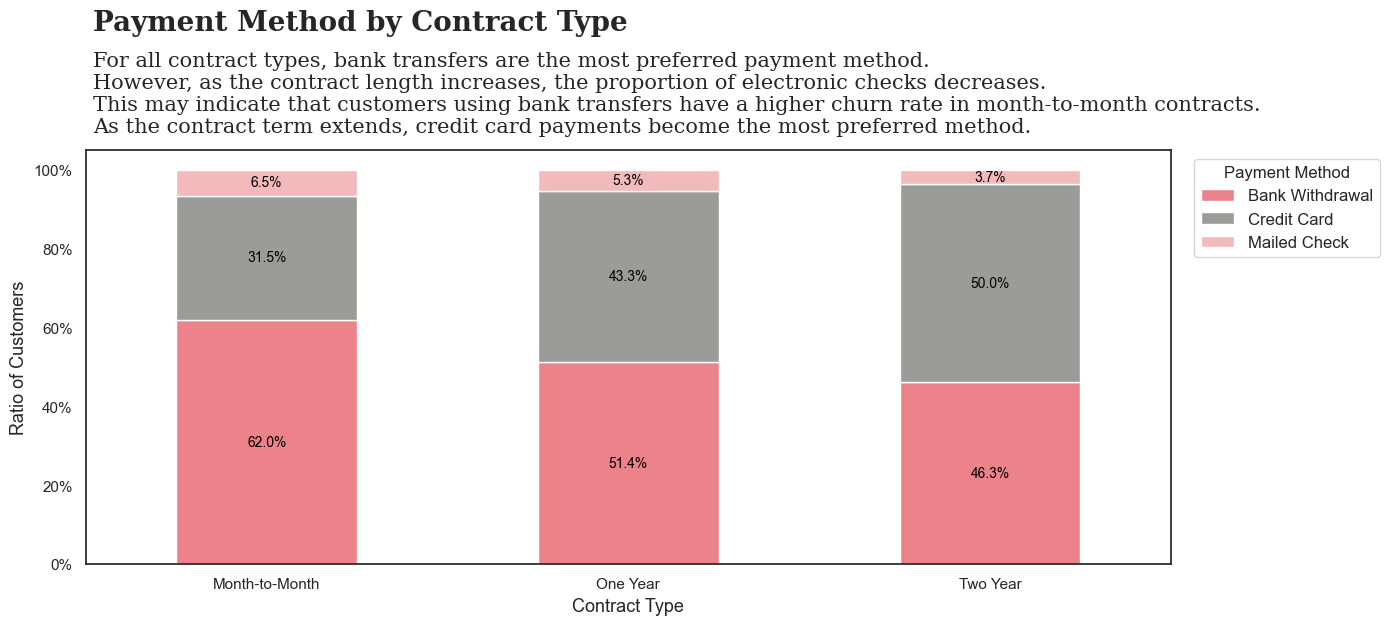

In [63]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Payment Method by Contract Type', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.83, 
         "For all contract types, bank transfers are the most preferred payment method. \nHowever, as the contract length increases, the proportion of electronic checks decreases. \nThis may indicate that customers using bank transfers have a higher churn rate in month-to-month contracts. \nAs the contract term extends, credit card payments become the most preferred method."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.80)


paymentRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Contract Type', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title='Payment Method', fontsize=12, loc='upper right', bbox_to_anchor=(1.20, 1))
plt.xticks(rotation=0)
plt.show()

1. 데이터 세트에 따르면 고객은 은행 송금, 신용 카드 및 메일 수표 순의 지불을 선호하며 가장 선호하는 것은 은행 송금으로 지불하는 것을 말해 주고 있습니다.
2. 모든 계약 유형의 경우 은행 송금을 가장 선호하지만, 계약 기간이 길어질수록 전자 수표의 비율이 낮아지는 경향을 보입니다. 이는 은행 송금을 사용하는 고객들이 월 단위 계약에서 이탈률이 높다는 것을 의미할 수 있습니다.
3. 장기계약으로 갈수록 신용카드 결제 방식을 가장 선호합니다.

In [64]:
churnCus = df[df['churn'] == 1]
stayCus = df[df['churn'] == 0]

churnPayment = churnCus.groupby(['contract', 'payment_method']).size().unstack()
churnAllPayment = churnPayment.sum(axis=1)
churnPaymentRatio = churnPayment.div(churnAllPayment, axis=0)

stayPayment = stayCus.groupby(['contract', 'payment_method']).size().unstack()
stayAllPayment = stayPayment.sum(axis=1)
stayPaymentRatio = stayPayment.div(stayAllPayment, axis=0)

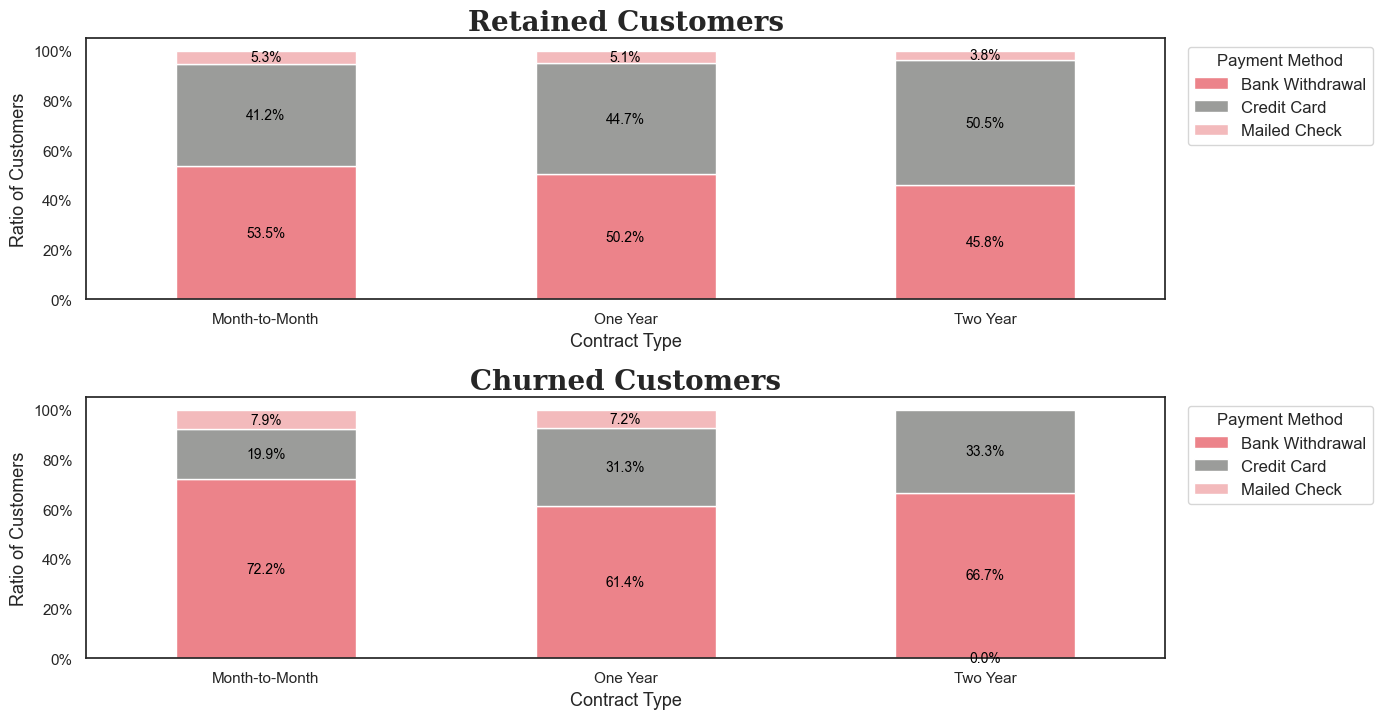

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# fig.text(0.13, 1, 'Payment Method by Contract Type (Retained Customers)', fontsize=20, fontweight='bold', fontfamily='serif')
# fig.text(0.13, 0.91, 
#          ""
#          , fontsize=15, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.85)

stayPaymentRatio.plot(kind='bar', stacked=True, ax=ax1, color=color)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.set_title('Retained Customers', fontweight = 'bold', fontsize = 20, fontfamily='serif')
ax1.set_xlabel('Contract Type', fontsize=13)
ax1.set_ylabel('Ratio of Customers', fontsize=13)
ax1.legend(title='Payment Method', fontsize=12, loc='upper right', bbox_to_anchor=(1.20, 1))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for container in ax1.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax1.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

churnPaymentRatio.plot(kind = 'bar', stacked = True, ax=ax2, color = color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))   
# ax.autoscale(enable=False, axis = 'both', tight = False)
ax2.set_title('Churned Customers', fontweight = 'bold', fontsize = 20, fontfamily='serif')
ax2.set_xlabel('Contract Type', fontsize=13)
ax2.set_ylabel('Ratio of Customers', fontsize=13)
ax2.legend(title='Payment Method', fontsize=12, loc='upper right', bbox_to_anchor=(1.20, 1))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
for container in ax2.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax2.bar_label(container, labels=labels, label_type='center', fontsize = 10, color = 'black')
 
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


1. 은행 인출 방식을 사용하는 고객이 Month-to-Month 계약에서 높은 이탈률을 보입니다. 이는 은행 인출 방식이 이탈률을 높이는 원인이 될 수 있음을 시사합니다.
2. 반면, 신용카드 사용 비율이 높은 Two Year 계약에서는 유지 고객 비율이 더 높습니다. 이는 신용카드 결제가 더 안정적인 고객 유지를 유도할 수 있음을 나타냅니다.
3. 신용카드 결제를 장려하거나 은행 인출 방식을 사용하는 고객에게 추가 혜택을 제공하는 등의 방법을 통해 이탈률을 낮출 수 있을 것입니다.

### 4. 마케팅 수락별 이탈률

In [66]:
offers = df.groupby(['offer', 'churn']).size().unstack()
offers.rename(columns = {0: 'Retained', 1: 'Churned'}, inplace = True)

offersAll = offers.sum(axis = 1)
offersRatio = offers.div(offersAll, axis = 0)
print(offersAll) ; print(offersRatio)

offer
None       3877
Offer A     520
Offer B     824
Offer C     415
Offer D     602
Offer E     805
dtype: int64
churn    Retained   Churned
offer                      
None     0.728914  0.271086
Offer A  0.932692  0.067308
Offer B  0.877427  0.122573
Offer C  0.771084  0.228916
Offer D  0.732558  0.267442
Offer E  0.470807  0.529193


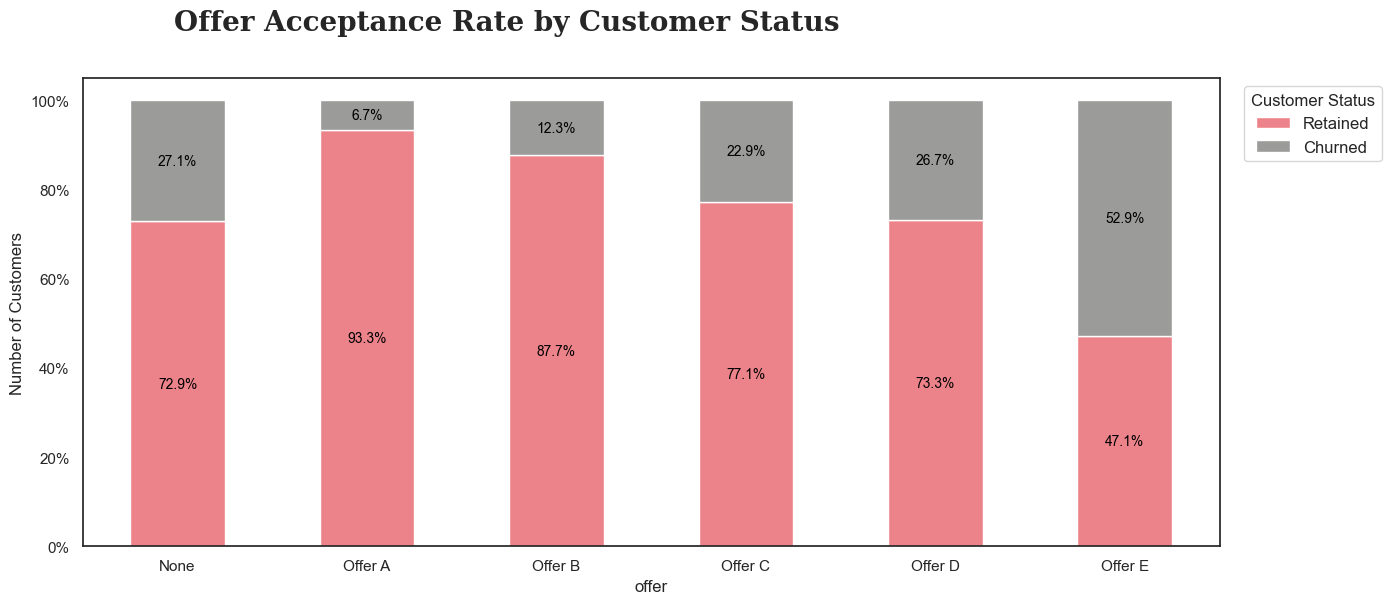

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (14,6))

fig.text(0.13, 1, 'Offer Acceptance Rate by Customer Status', fontfamily = 'serif', fontweight = 'bold', fontsize = 20)
fig.text(0.13, 0.91, 
         ""
         , fontsize=18, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.85)

offersRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color[:2])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.legend(title='Customer Status', fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

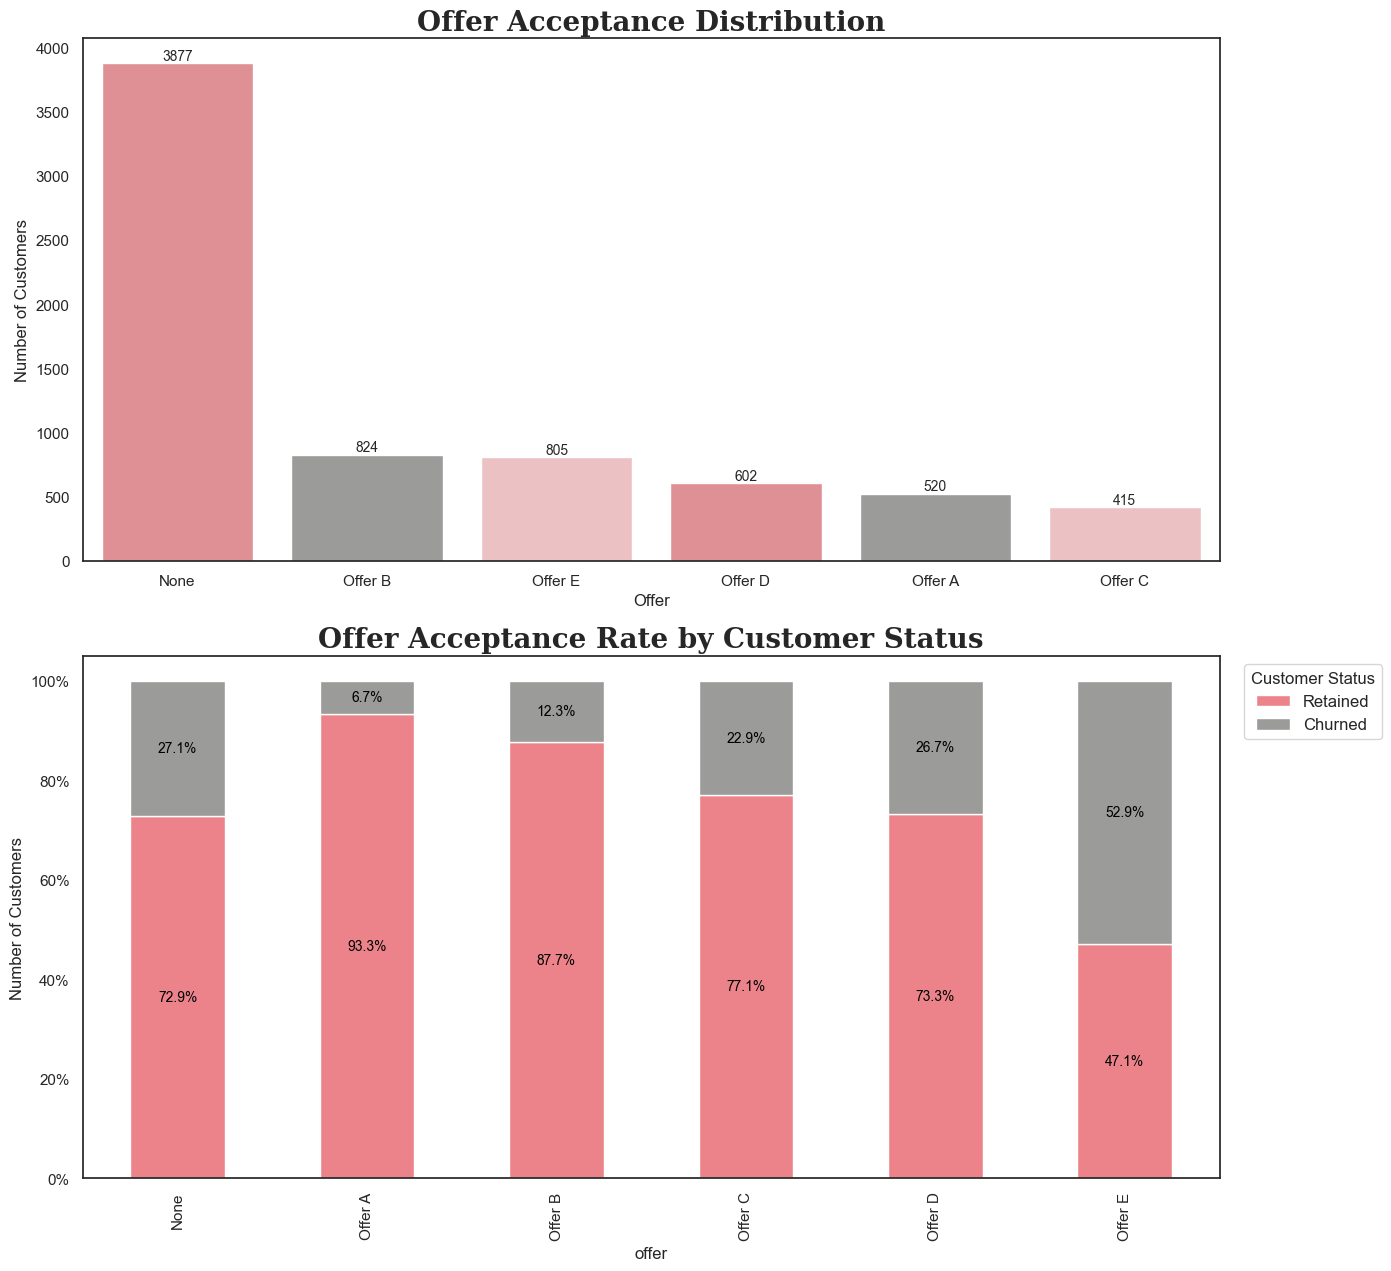

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14,14))

# ax1
sns.barplot(x = df['offer'].value_counts().index, y = df['offer'].value_counts().values, palette = color, ax=ax1)
for i, count in enumerate(df['offer'].value_counts().values):
    ax1.text(i, count + 5, str(count), ha='center', va = 'bottom', fontsize = 10)
ax1.set_title('Offer Acceptance Distribution', fontfamily = 'serif', fontweight = 'bold', fontsize = 20)
ax1.set_xlabel('Offer')
ax1.set_ylabel('Number of Customers')

# ax2
ax2 = offersRatio.plot(kind = 'bar', stacked = True, ax=ax2, color = color[:2])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax2.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax2.autoscale(enable=False, axis='both', tight=False)

ax2.set_title('Offer Acceptance Rate by Customer Status', fontfamily = 'serif', fontweight = 'bold', fontsize = 20)
ax2.set_ylabel('Number of Customers')
ax2.legend(title='Customer Status', fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 대부분의 고객이 마케팅을 수락하지 않고 있습니다. 이는 오퍼의 매력도가 낮거나, 오퍼의 전달 방법이 효과적이지 않았을 가능성을 시사합니다.
- 오퍼 B와 E의 수락비율이 가장 많이 수락된 오퍼입니다.
    - 오퍼를 받지 않고도 유지 중인 고객이 대부분인 반면에, 오퍼 E를 수락한 고객의 절반 이상이 이탈했습니다. 오퍼 E의 전략을 재검토하고 개선할 필요가 있습니다.
    - 오퍼 B는 유지 고객에게 효과적입니다. 이 오퍼의 성공 요인을 분석하고, 유사한 오퍼를 더 많이 제공하는 것이 좋겠습니다.
- 오퍼 A와 C는 가장 적은 수락율을 보이고 있습니다. 오퍼의 내용을 재검토하거나, 전달 방법을 재검토할 필요성이 있습니다.
    - 오퍼 A를 수락한 고객의 대부분이 유지 고객인 반면에, 적은 수락율을 보이고 있습니다. 전달 방법을 재검토할 필요성이 있습니다.
    - 오퍼 C의 경우, 적은 수락율과 상대적으로 높은 이탈 고객률을 확인할 수 있습니다. 이 오퍼의 내용을 재검토하거나 다른 오퍼로 대체하는 것이 필요합니다.
    
- 마케팅을 통한 신규 고객 유치: 유지 고객에게 효과적인 오퍼 B와 유사한 오퍼를 제공하며 신규 고객을 유치할 수 있습니다. 가입 초기 고객에게는 특히 매력적인 혜택을 제공하여 초기 이탈을 방지하는 것이 중요합니다.
- 맞춤형 마케팅: 유지 고객에게 효과적인 오퍼 B와 유사한 오퍼, 또는 혜택을 제공하여 충성도를 높이는 맞춤형 마케팅을 실행할 수 있습니다.
    - 이탈 가능성이 높은 고객의 이탈 원인을 분석하고, 이를 해결하는 오퍼를 개발합니다.
- 오퍼 효과성 평가: 오퍼가 고객 유지 및 이탈 방지에 얼마나 효과적인지 평가해야 합니다. 어떤 오퍼가 가장 효과적인지, 어떤 오퍼가 개선이 필요한지를 지속적으로 모니터링합니다. 이를 통해 더 효과적인 오퍼를 개발하고, 덜 효과적인 오퍼는 개선하거나 제거할 수 있습니다.

- 오퍼 전달 방법 개선: 오퍼 전달 방법에 대한 개선이 필요할 수 있습니다. 이메일, 문자 메시지, 전화 등을 통한 오퍼 전달 방법의 효과성을 분석하여, 가장 효과적인 전달 방법을 채택합니다.
    - 오퍼의 전달 타이밍도 중요한 요소일 수 있으므로, 이를 최적화하는 방안을 모색합니다.
- 추가 인센티브 제공: 오퍼 수락율을 높이기 위해 추가적인 인센티브를 제공할 수 있습니다. 예를 들어, 오퍼와 함께 제공되는 할인, 포인트 적립, 무료 서비스 등의 혜택을 강화합니다.

고객 상태와 오퍼 수락율을 분석한 결과를 바탕으로, 오퍼 전략을 재검토하고, 맞춤형 오퍼를 제공하며, 신규 고객 유치 전략을 강화할 수 있는 방안을 도출할 수 있습니다. 이를 통해 고객 이탈을 줄이고, 충성 고객을 확보하며, 더 많은 신규 고객을 유치할 수 있습니다. 고객 세그먼트별로 오퍼 수락율과 고객 상태를 분석하여, 특정 세그먼트에 맞는 오퍼를 제공할 수 있습니다. 예를 들어, 특정 연령대나 지역의 고객에게 더 효과적인 오퍼를 식별합니다.

### 5. 결혼 여부별 이탈률

In [69]:
df2 = df[['age', 'married', 'number_of_dependents', 'number_of_referrals', 'churn']]
df2['churn'] = df2['churn'].map({0: 'Retained', 1: 'Churned'})
df2['married'] = df2['married'].map({0: 'No', 1: 'Yes'})
df2.head(3)

age married  number_of_dependents  number_of_referrals     churn
0   37     Yes                     0                    2  Retained
1   46      No                     0                    0  Retained
2   50      No                     0                    0   Churned

In [70]:
married = df2.groupby(['churn', 'married']).size().unstack()
marriedAll = married.sum(axis=1)
marriedRatio = married.div(marriedAll, axis=0)
marriedRatio

married         No       Yes
churn                       
Churned   0.642055  0.357945
Retained  0.471782  0.528218

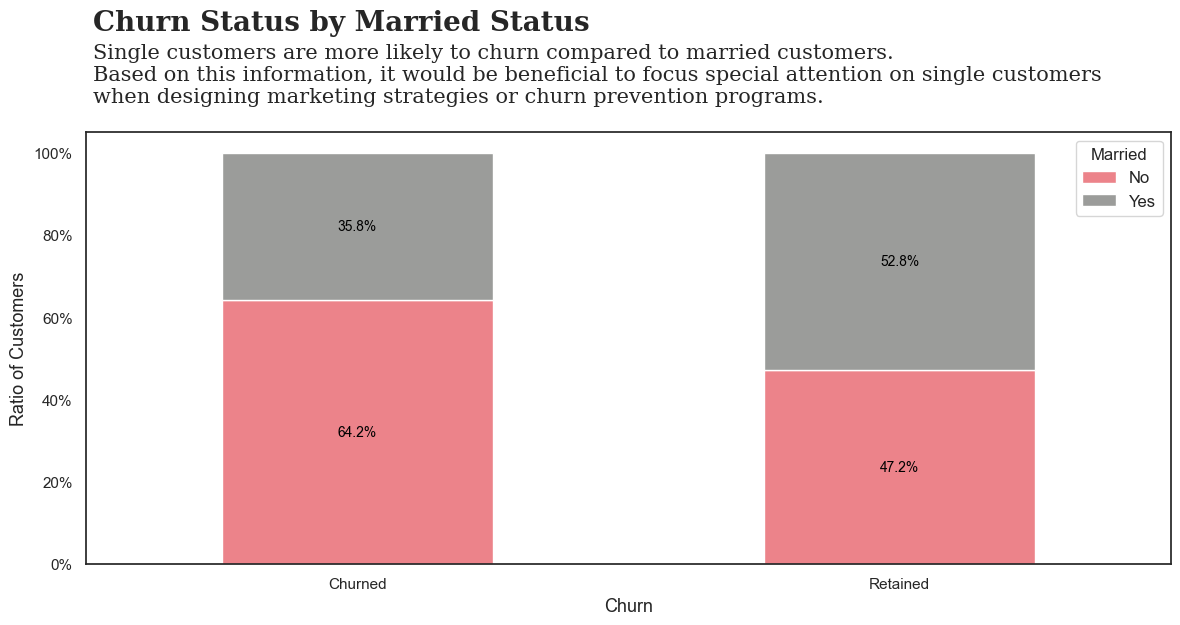

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Status by Married Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "Single customers are more likely to churn compared to married customers. \nBased on this information, it would be beneficial to focus special attention on single customers \nwhen designing marketing strategies or churn prevention programs."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


marriedRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Churn', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
plt.legend(title='Married', fontsize=12)
plt.xticks(rotation=0)
plt.show()

1. 이탈한 고객 중 미혼 고객이 3/4를 차지합니다.
2. 이탈하지 않은 고객의 결혼 여부는 거의 비슷합니다.
3. 미혼 고객이 기혼 고객보다 이탈할 가능성이 더 크다는 것을 알 수 있습니다.

### 6. 부양 가족 여부별 이탈률

In [72]:
df2.head()

age married  number_of_dependents  number_of_referrals     churn
0   37     Yes                     0                    2  Retained
1   46      No                     0                    0  Retained
2   50      No                     0                    0   Churned
3   78     Yes                     0                    1   Churned
4   75     Yes                     0                    3   Churned

In [73]:
dependents = df2.groupby(['churn', 'number_of_dependents']).size().unstack()
dependentsAll = dependents.sum(axis=1)
dependentsRatio = dependents.div(dependentsAll, axis=0)
dependentsRatio

number_of_dependents         0         1         2         3         4  \
churn                                                                    
Churned               0.943285  0.020332  0.017657  0.016051  0.000535   
Retained              0.706030  0.099536  0.096250  0.094124  0.001546   

number_of_dependents         5         6         7         8         9  
churn                                                                   
Churned               0.001070  0.000535  0.000535       NaN       NaN  
Retained              0.001546  0.000387  0.000193  0.000193  0.000193

In [74]:
df2['dependents'] = df2['number_of_dependents'].apply(lambda x: 'Yes' if x > 0 else 'No')
dependents = df2.groupby(['churn', 'dependents']).size().unstack()
dependentsAll = dependents.sum(axis=1)
dependentsRatio = dependents.div(dependentsAll, axis=0)
dependentsRatio

dependents        No       Yes
churn                         
Churned     0.943285  0.056715
Retained    0.706030  0.293970

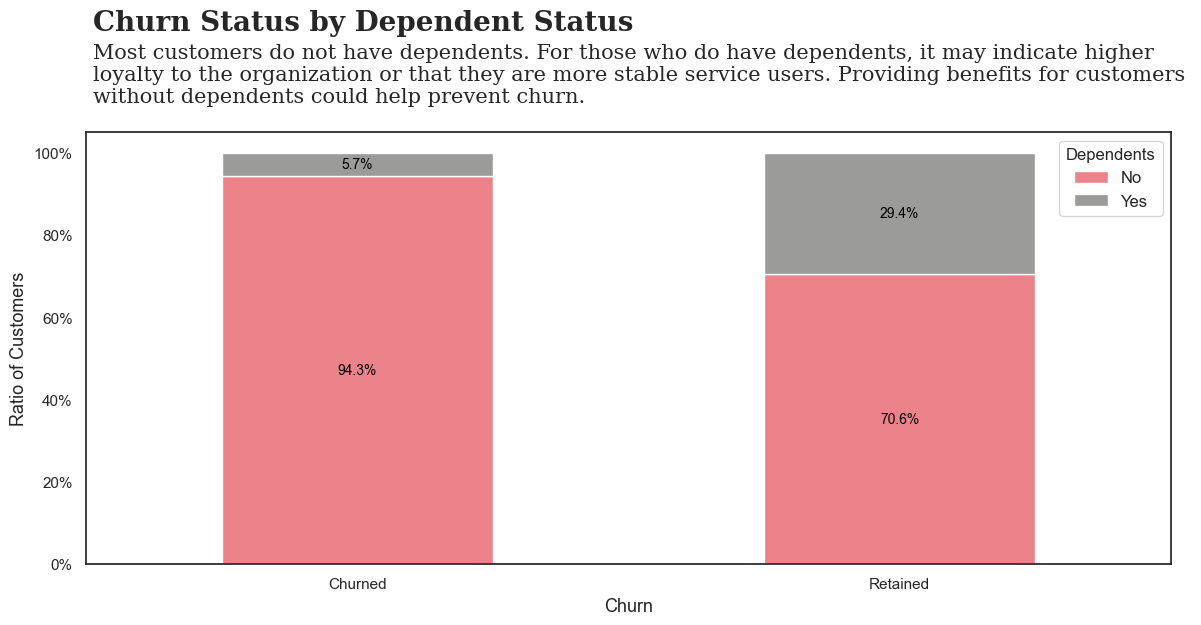

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Status by Dependent Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "Most customers do not have dependents. For those who do have dependents, it may indicate higher \nloyalty to the organization or that they are more stable service users. Providing benefits for customers \nwithout dependents could help prevent churn."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


dependentsRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Churn', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
plt.legend(title='Dependents', fontsize=12)
plt.xticks(rotation=0)
plt.show()

1. 이 결과는 부양가족이 없는 고객이 부양가족이 있는 고객보다 이탈할 가능성이 훨씬 높다는 것을 시사합니다.
- 부양가족이 없는 고객 (No Dependents): 이 그룹은 이탈률이 높으며, 이는 고객 유지 전략에서 중요한 시사점을 제공합니다. 부양가족이 없는 고객은 이탈할 위험이 높으므로, 이 그룹을 타겟으로 한 고객 유지 프로그램을 설계할 필요가 있습니다.
- 부양가족이 있는 고객 (Yes Dependents): 이 그룹은 약 5%의 이탈률로 이탈률이 현저히 낮습니다. 이는 부양가족이 있는 고객이 회사에 더 충성도가 높거나, 더 안정적인 서비스 사용자임을 나타낼 수 있습니다.
2. 마케팅 전략:
- 부양가족이 없는 고객을 위한 특별한 혜택 제공: 이 그룹은 이탈 위험이 높으므로, 이들에게 특별한 혜택이나 맞춤형 서비스 제공을 통해 이탈을 방지할 수 있습니다.
- 고객 충성도 프로그램 강화: 부양가족이 있는 고객의 충성도를 유지하면서, 부양가족이 없는 고객에게도 비슷한 프로그램을 적용하여 이탈률을 줄일 수 있습니다.

### 7. 추천 횟수별 이탈률

In [76]:
df2.head()

age married  number_of_dependents  number_of_referrals     churn dependents
0   37     Yes                     0                    2  Retained         No
1   46      No                     0                    0  Retained         No
2   50      No                     0                    0   Churned         No
3   78     Yes                     0                    1   Churned         No
4   75     Yes                     0                    3   Churned         No

In [77]:
df2['number_of_referrals'].unique()

array([ 2,  0,  1,  3,  8,  9, 10,  5,  4,  7,  6, 11])

In [78]:
referrals = df2.groupby(['number_of_referrals', 'churn']).size().unstack()
referralsAll = referrals.sum(axis=1)
referralsRatio = referrals.div(referralsAll, axis=0)
referralsRatio

churn                 Churned  Retained
number_of_referrals                    
0                    0.325831  0.674169
1                    0.466851  0.533149
2                    0.110169  0.889831
3                    0.125490  0.874510
4                    0.076271  0.923729
5                    0.079545  0.920455
6                    0.036199  0.963801
7                    0.024194  0.975806
8                    0.009390  0.990610
9                    0.016807  0.983193
10                        NaN  1.000000
11                        NaN  1.000000

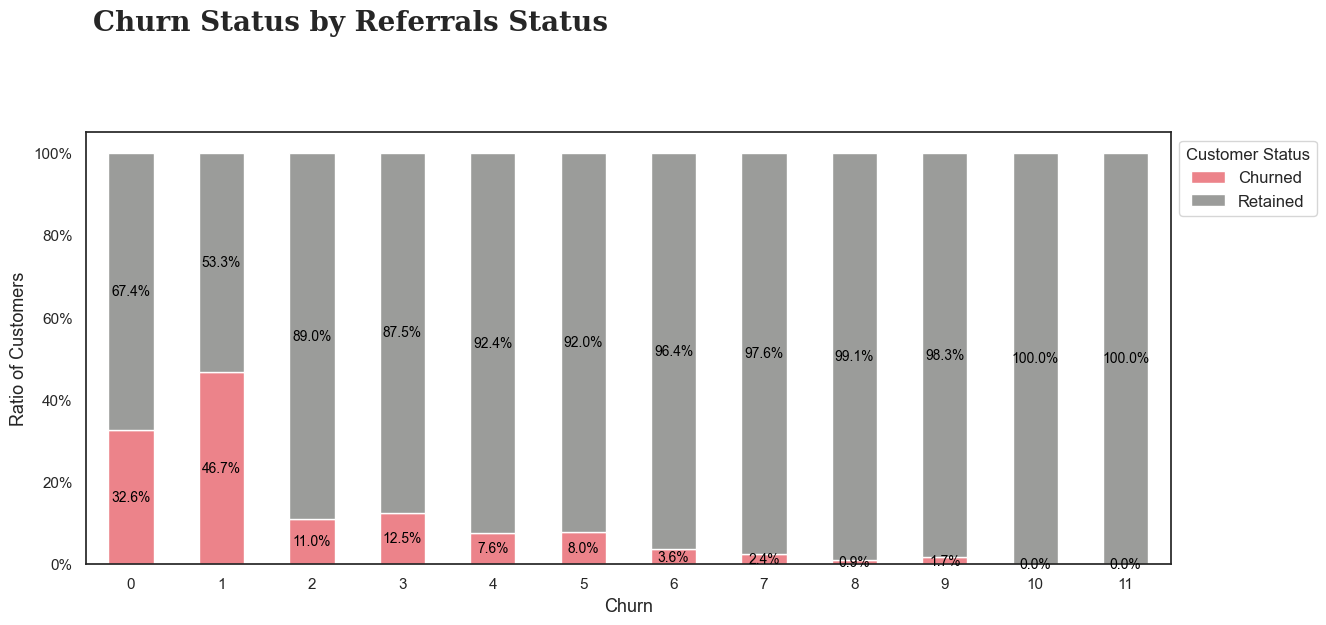

In [79]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Status by Referrals Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "", fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


referralsRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Churn', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
plt.legend(title='Customer Status', fontsize=12, bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

In [80]:
df2['referrals'] = df2['number_of_referrals'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 'Over 2')
referrals = df2.groupby(['referrals', 'churn']).size().unstack()
referralsAll = referrals.sum(axis=1)
referralsRatio = referrals.div(referralsAll, axis=0)
referralsRatio

churn       Churned  Retained
referrals                    
0          0.325831  0.674169
1          0.466851  0.533149
Over 2     0.054775  0.945225

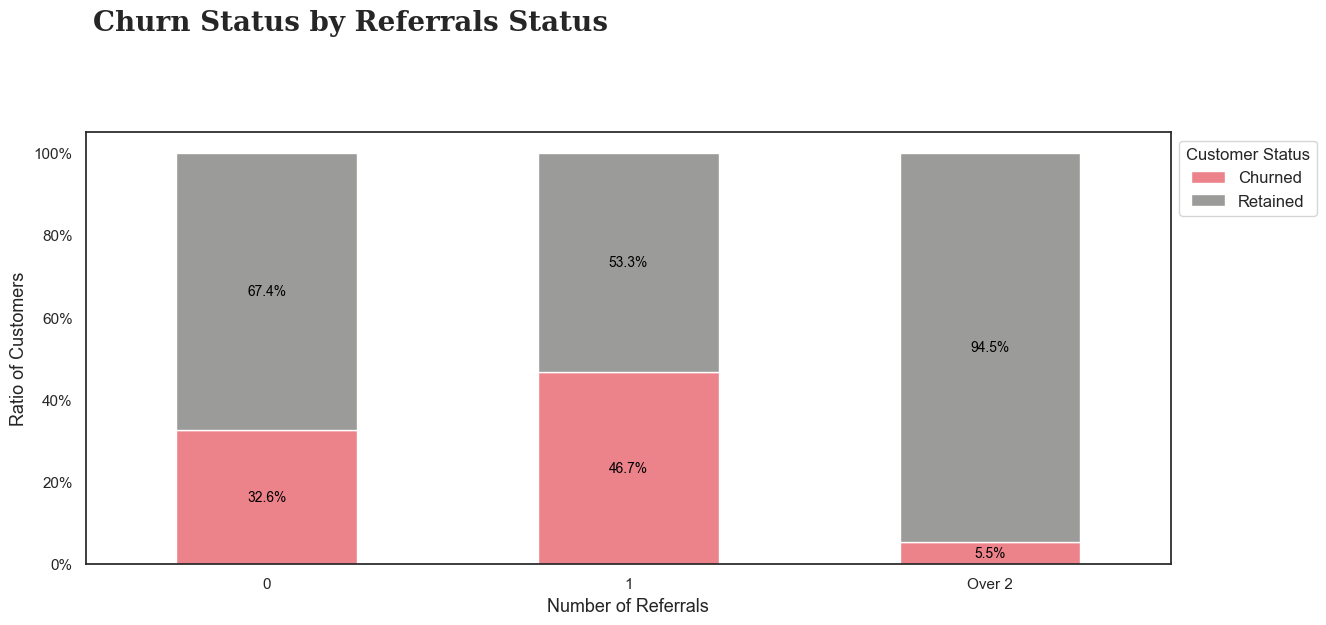

In [81]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Status by Referrals Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "", fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


referralsRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Number of Referrals', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
plt.legend(title='Customer Status', fontsize=12, bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

In [82]:
df['referrals'] = df['number_of_referrals'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 'Over 2')

### 8. 연령대별 이탈률

In [83]:
df2.head()

age married  number_of_dependents  number_of_referrals     churn  \
0   37     Yes                     0                    2  Retained   
1   46      No                     0                    0  Retained   
2   50      No                     0                    0   Churned   
3   78     Yes                     0                    1   Churned   
4   75     Yes                     0                    3   Churned   

  dependents referrals  
0         No    Over 2  
1         No         0  
2         No         0  
3         No         1  
4         No    Over 2

In [84]:
df2['senior'] = df['age'].apply(lambda x: 'Senior' if x >= 65 else 'Young')
senior = df2.groupby(['senior', 'churn']).size().unstack()
seniorAll = senior.sum(axis=1)
seniorRatio = senior.div(seniorAll, axis=0)
seniorRatio

churn    Churned  Retained
senior                    
Senior  0.416813  0.583187
Young   0.236062  0.763938

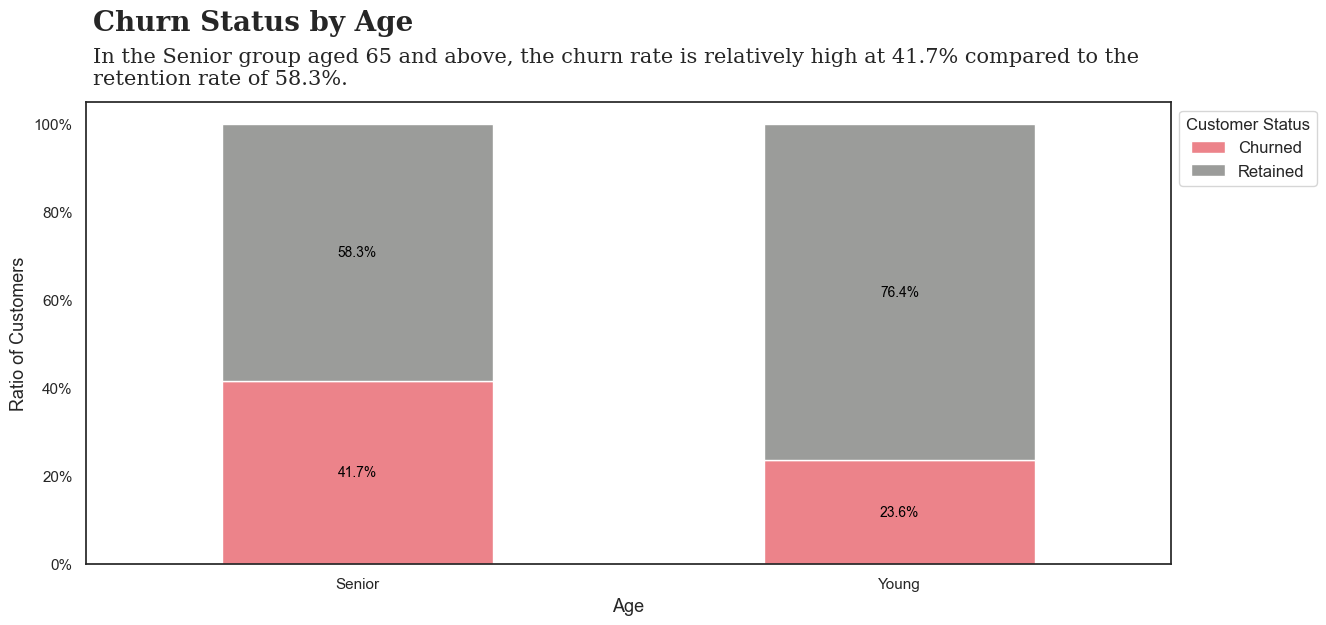

In [85]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Status by Age', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
         "In the Senior group aged 65 and above, the churn rate is relatively high at 41.7% compared to the \nretention rate of 58.3%."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.88)

seniorRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Age', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
plt.legend(title='Customer Status', fontsize=12, bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

### 8-4. 상관관계

In [86]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn', 'senior', 'tenure_in_years', 'referrals'],
      dtype='object')

In [87]:
df.head()

customer_id  gender  age  married  number_of_dependents  \
0  0002-ORFBO       0   37        1                     0   
1  0003-MKNFE       1   46        0                     0   
2  0004-TLHLJ       1   50        0                     0   
3  0011-IGKFF       1   78        1                     0   
4  0013-EXCHZ       0   75        1                     0   

   number_of_referrals  tenure_in_months    offer  phone_service  \
0                    2                 9     None              1   
1                    0                 9     None              1   
2                    0                 4  Offer E              1   
3                    1                13  Offer D              1   
4                    3                 3     None              1   

   avg_monthly_long_distance_charges  ... monthly_charge  total_charges  \
0                              42.39  ...           65.6         593.30   
1                              10.69  ...           -4.0         542.40   
2                              33.65  ...           73.9         280.85   
3                              27.82  ...           98.0        1237.85   
4                               7.38  ...           83.9         267.40   

  total_refunds  total_extra_data_charges total_long_distance_charges  \
0          0.00                         0                      381.51   
1         38.33                        10                       96.21   
2          0.00                         0                      134.60   
3          0.00                         0                      361.66   
4          0.00                         0                       22.14   

  total_revenue churn senior tenure_in_years referrals  
0        974.81     0      0               1    Over 2  
1        610.28     0      0               1         0  
2        415.45     1      0               1         0  
3       1599.51     1      1               2         1  
4        289.54     1      1               1    Over 2  

[5 rows x 35 columns]

In [88]:
correlations = df.corrwith (df.churn)
correlations = correlations [correlations!=1]

positive_correlations = correlations[correlations >0].sort_values (ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending= False)

print('Most Positive Correlations: \n', positive_correlations)
print ('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 internet_service                     0.227890
paperless_billing                    0.191825
monthly_charge                       0.187833
senior                               0.150889
age                                  0.115760
phone_service                        0.011942
total_extra_data_charges             0.007139
avg_monthly_long_distance_charges    0.002752
dtype: float64

Most Negative Correlations: 
 gender                        -0.008612
total_refunds                 -0.033709
avg_monthly_gb_download       -0.083262
married                       -0.150448
total_charges                 -0.198546
number_of_dependents          -0.218780
total_revenue                 -0.223003
total_long_distance_charges   -0.223756
number_of_referrals           -0.286540
tenure_in_years               -0.342196
tenure_in_months              -0.352861
dtype: float64


### 8-5. 상관관계 그래프

Text(0, 0.5, 'Features')

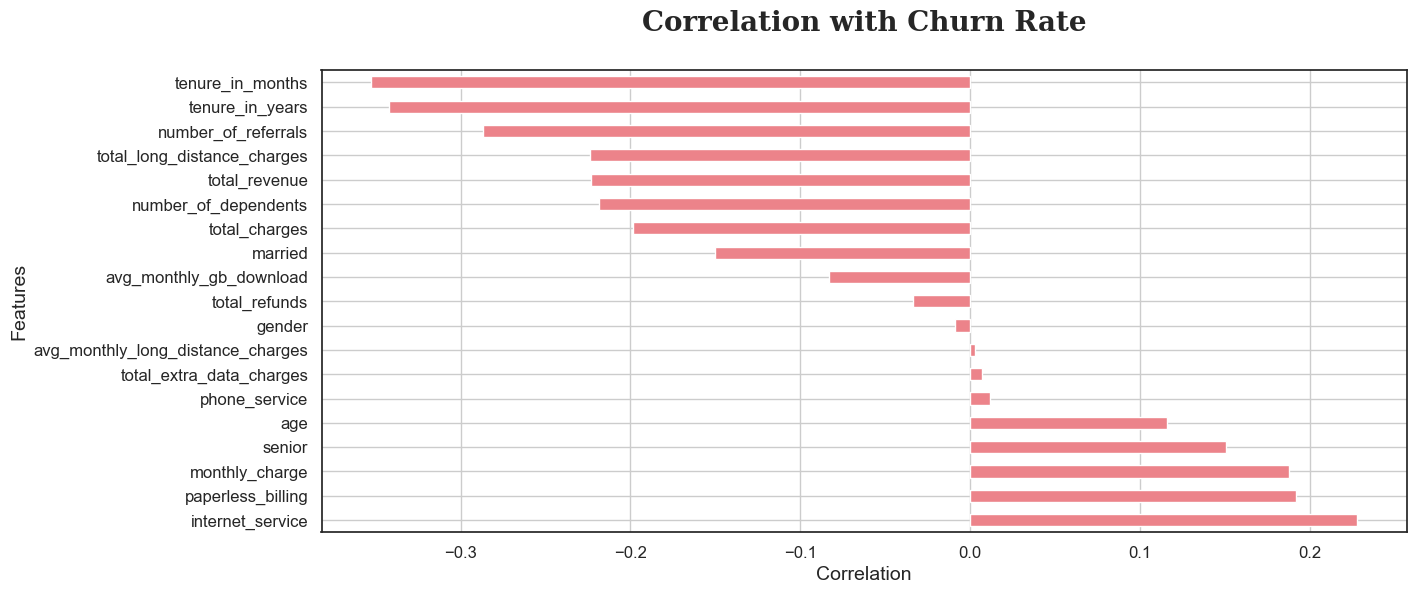

In [89]:
correlations = correlations.sort_values(ascending = False)
correlations.plot.barh(figsize = (14,6), fontsize = 12, color = color[0], rot = 0, grid = True)
plt.title('Correlation with Churn Rate\n', fontsize = 20, fontfamily = 'serif', fontweight = 'bold')
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('Features', fontsize=14)


In [90]:
df = df.drop(columns = ['tenure_in_years', 'age'])

### 8-6. 상관관계 매트릭스

<AxesSubplot: >

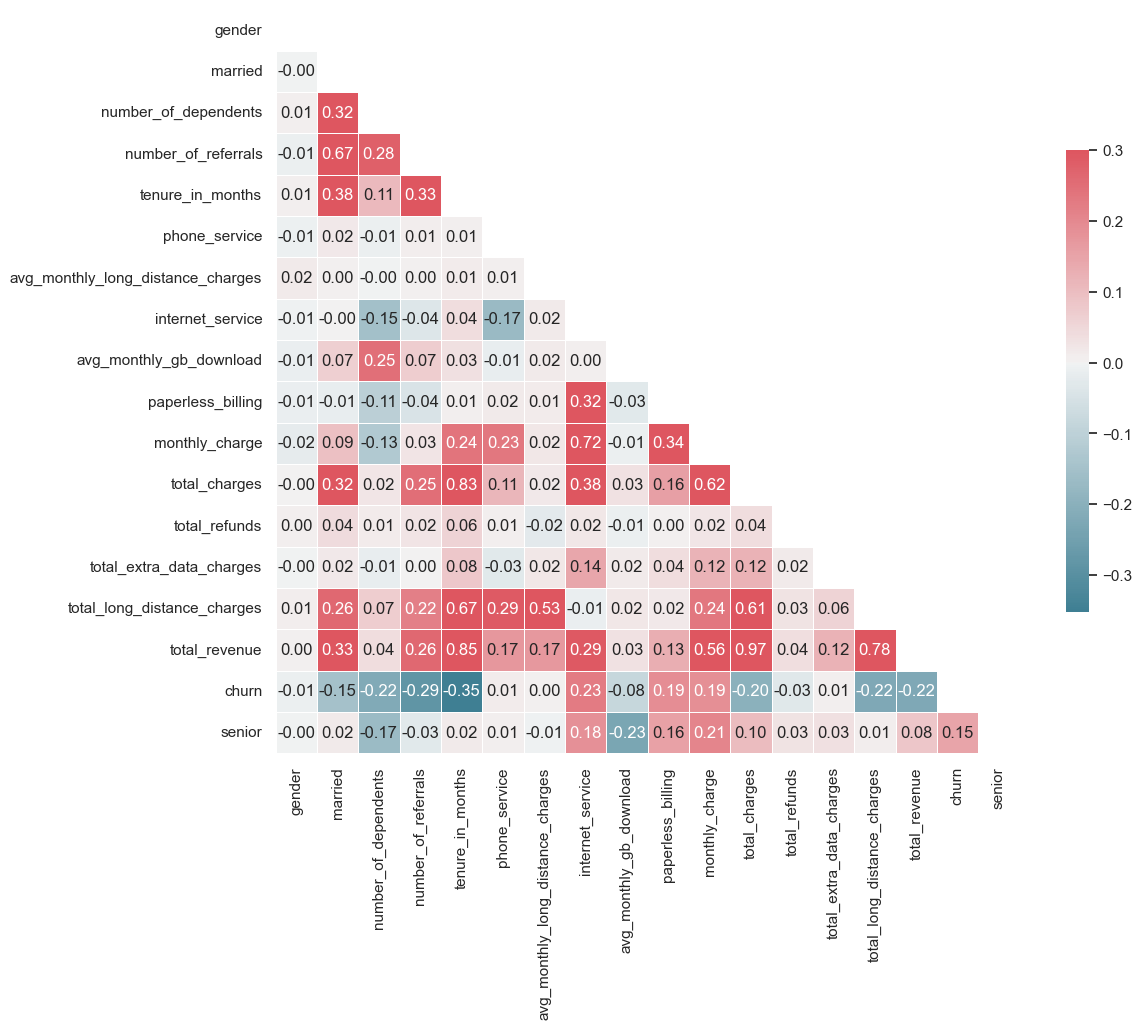

In [91]:
corr = df.corr()
plt.figure(figsize = (12,12))
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, fmt = ".2f", mask = mask, cmap = cmap, annot = True,
           vmax = .3, 
            center = 0, square = True, linewidths = .5, cbar_kws = {"shrink" : .5})

### 8-7. VIF 사용하여 다중공선성 확인

- VIF (Variable Inflation Factors)를 사용하여 다중공선성을 본다 상관 관계 매트릭스와는 달리 VIF는 데이터 세트의 다른 독립 변수 그룹과 변수의 상관 관계 강도를 결정한다. VIF는 일반적으로 1에서 시작하며 어떤 지표에서든 이 값이 10을 초과한다는 것은 독립 변수 간의 다중공선성이 높다는 것을 의미한다.

In [92]:
cols = []
for col in df.columns:
    if df[col].dtype != 'object':
        if col != 'churn':
            cols.append(col)
print(cols)

['gender', 'married', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'avg_monthly_long_distance_charges', 'internet_service', 'avg_monthly_gb_download', 'paperless_billing', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'senior']


In [93]:
df2 = df[cols]
df2.head(2)

gender  married  number_of_dependents  number_of_referrals  \
0       0        1                     0                    2   
1       1        0                     0                    0   

   tenure_in_months  phone_service  avg_monthly_long_distance_charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   

   internet_service  avg_monthly_gb_download  paperless_billing  \
0                 1                     16.0                  1   
1                 1                     10.0                  0   

   monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
0            65.6          593.3           0.00                         0   
1            -4.0          542.4          38.33                        10   

   total_long_distance_charges  total_revenue  senior  
0                       381.51         974.81       0  
1                        96.21         610.28       0

In [94]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

print(calc_vif(df2))

                            variables        VIF
0                              gender   1.978492
1                             married   3.911034
2                number_of_dependents   1.537103
3                 number_of_referrals   2.665481
4                    tenure_in_months  11.628995
5                       phone_service   8.986613
6   avg_monthly_long_distance_charges   7.269276
7                    internet_service  12.258074
8             avg_monthly_gb_download   3.517700
9                   paperless_billing   2.821382
10                     monthly_charge  24.462162
11                      total_charges        inf
12                      total_refunds        inf
13           total_extra_data_charges        inf
14        total_long_distance_charges        inf
15                      total_revenue        inf
16                             senior   1.345673


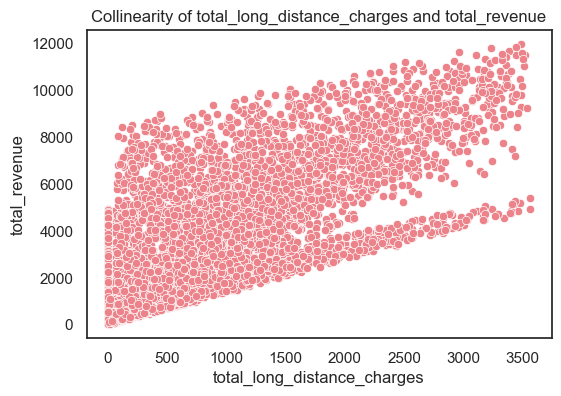

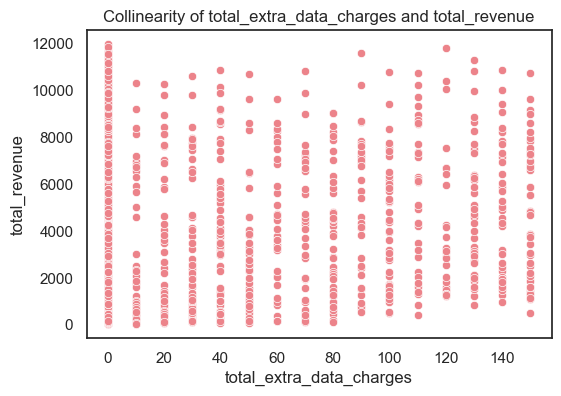

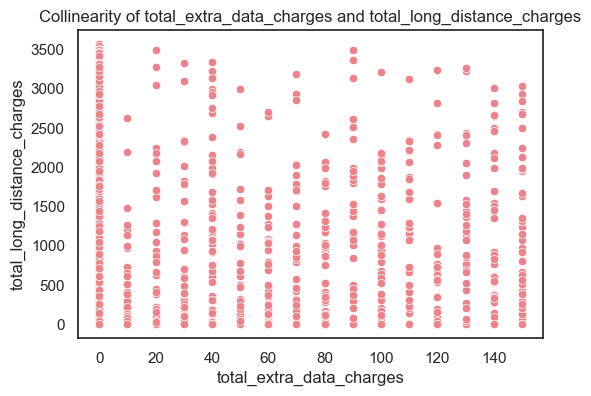

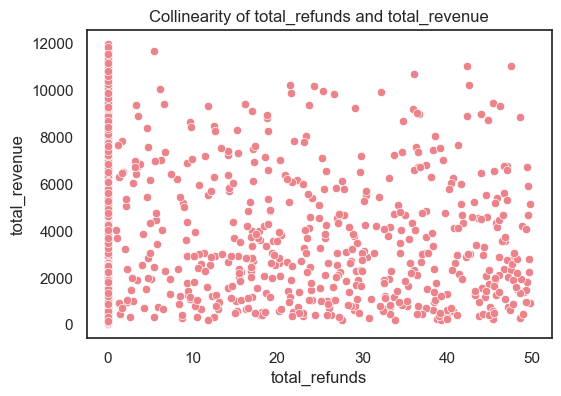

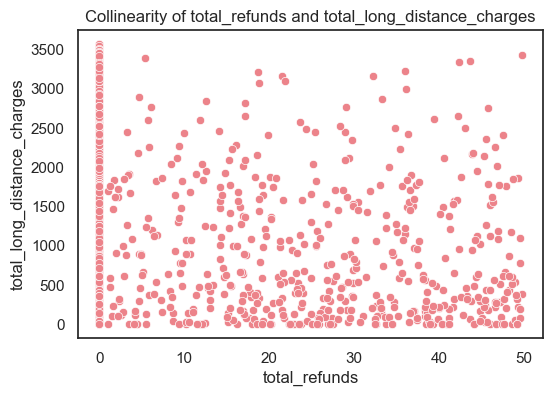

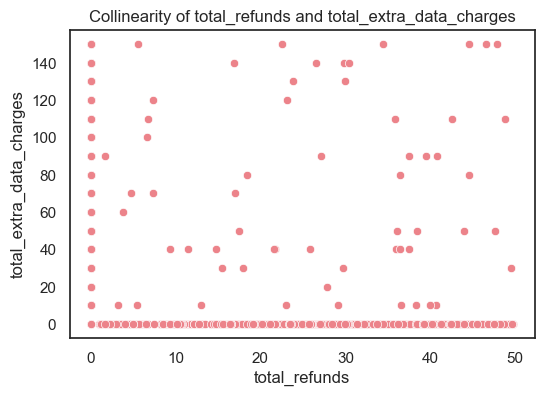

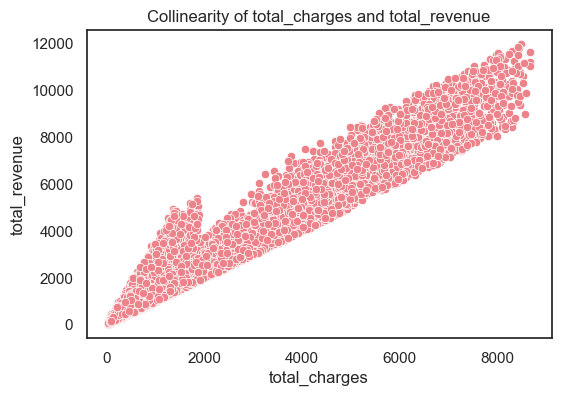

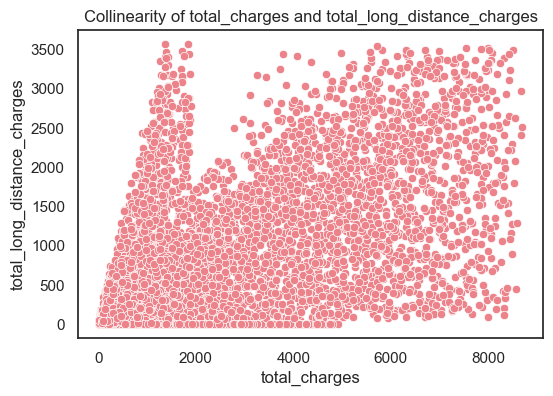

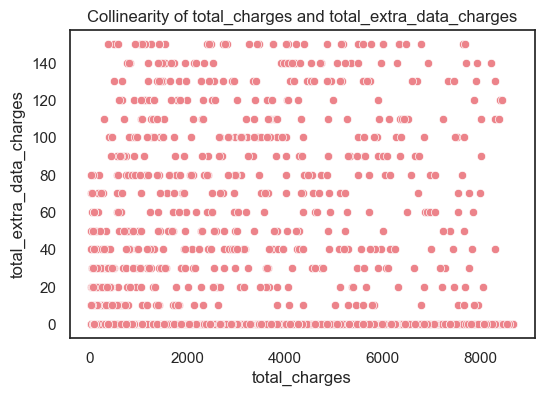

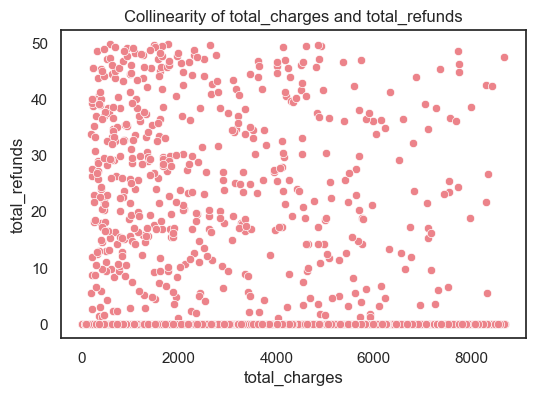

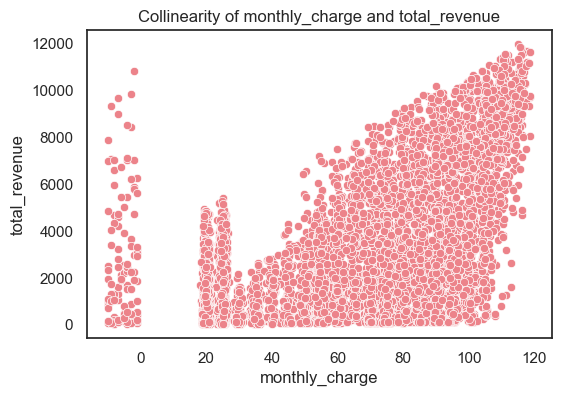

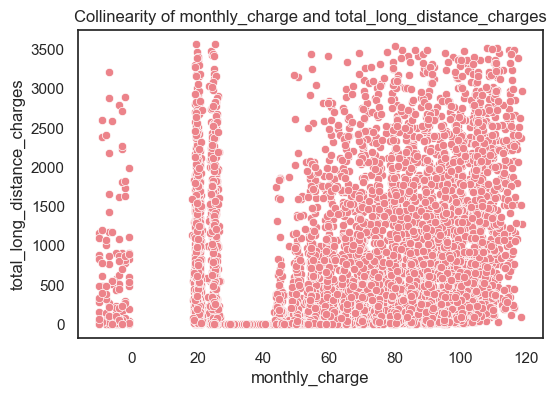

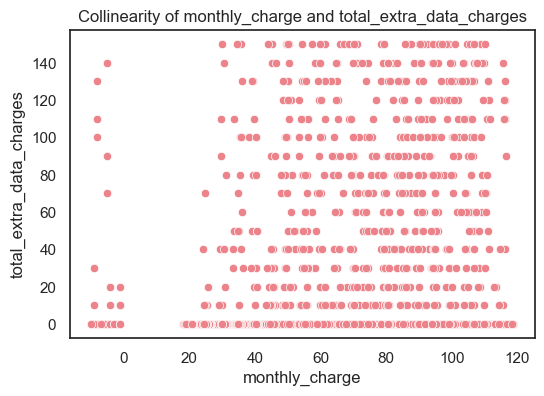

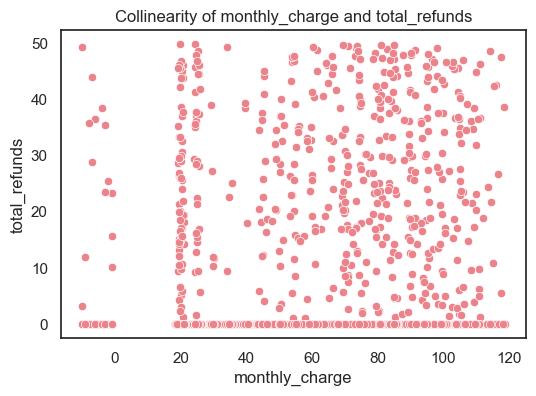

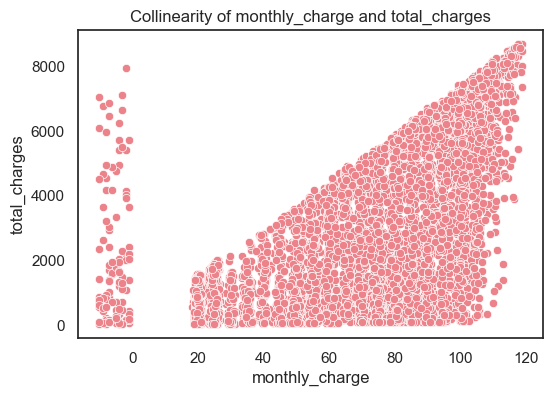

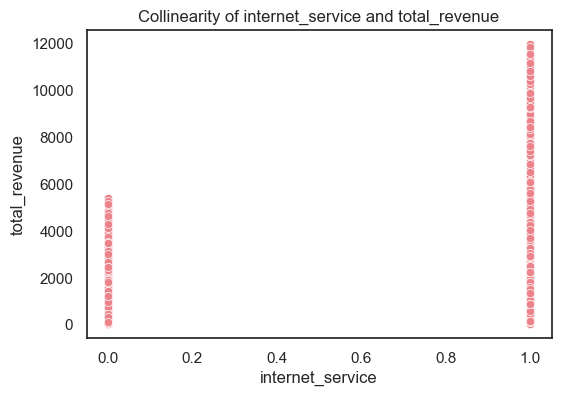

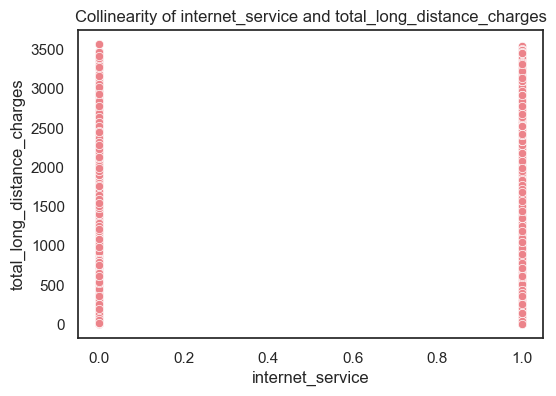

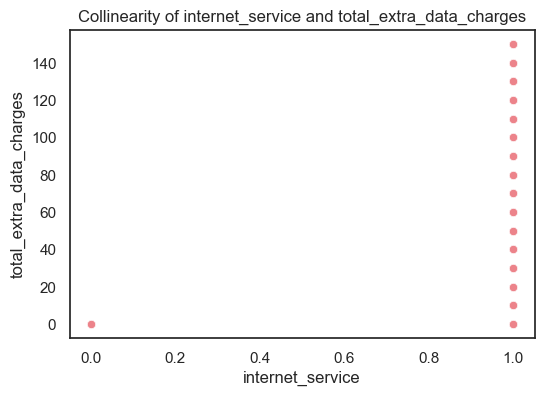

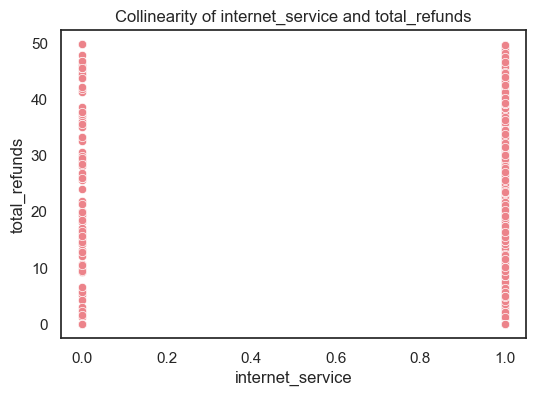

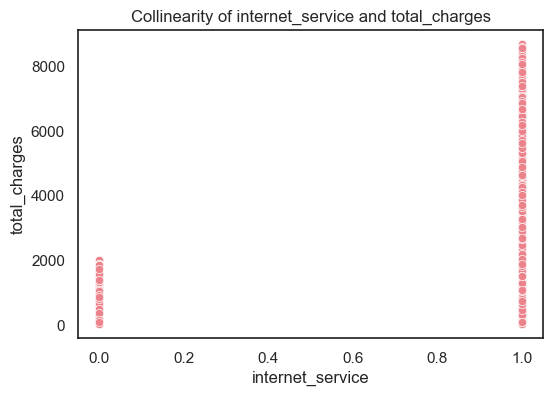

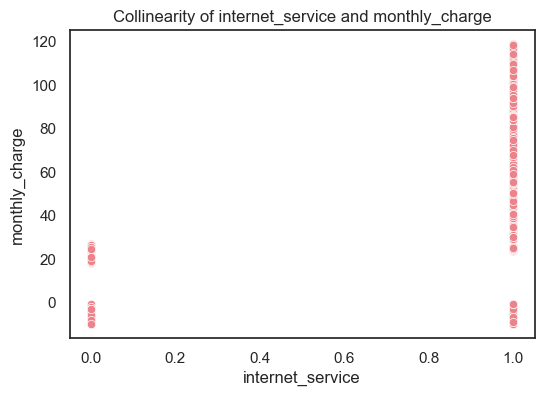

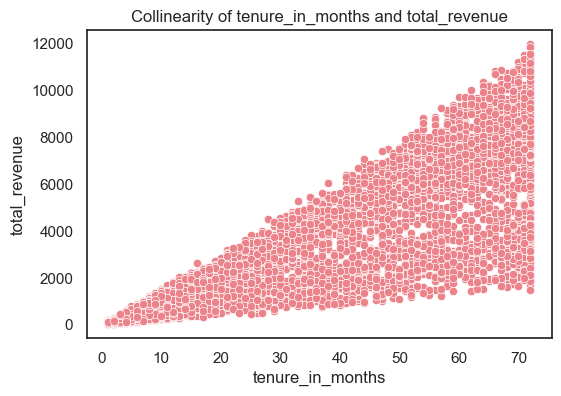

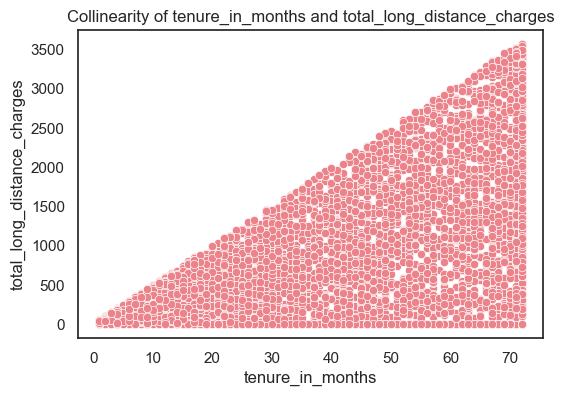

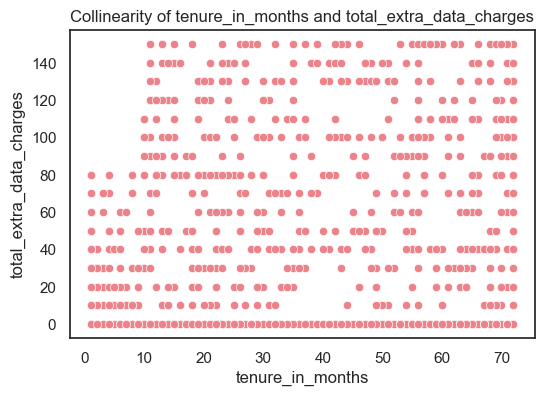

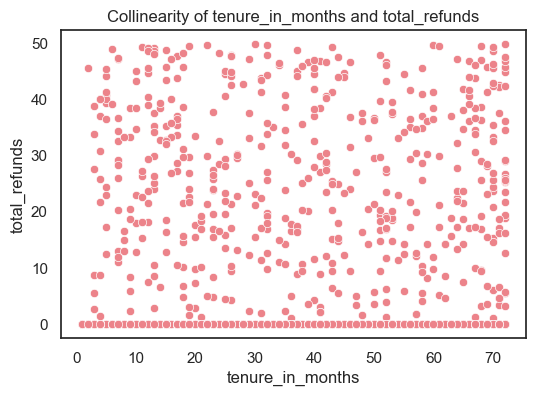

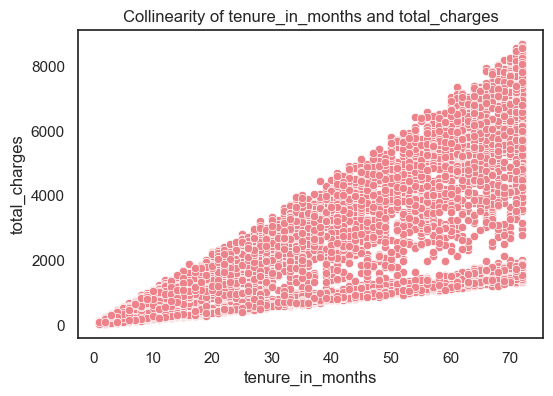

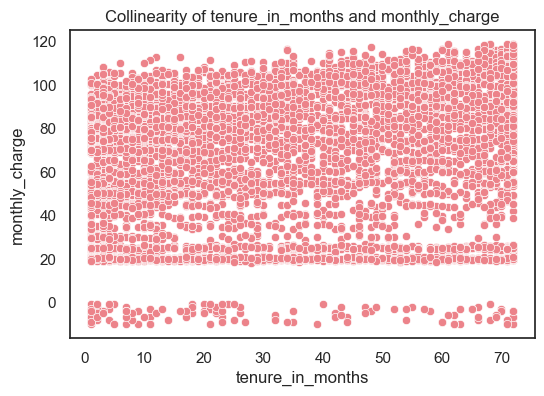

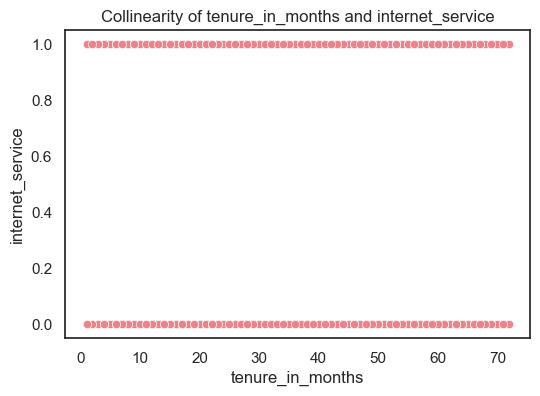

In [95]:
variables = ['total_revenue', 'total_long_distance_charges', 'total_extra_data_charges', 
             'total_refunds', 'total_charges', 'monthly_charge', 'internet_service', 'tenure_in_months']

for i in range(len(variables)):
    for j in range(len(variables)):
        if variables[i] == variables[j]:
            continue
        elif i < j:
            continue
        else:
            # print(variables[i], variables[j])
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[variables[i]], y=df[variables[j]], color=color[0])
            plt.title(f'Collinearity of {variables[i]} and {variables[j]}')
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.show()
        


In [96]:
df2 = df2.drop(columns = 'total_revenue')

In [97]:
print(calc_vif(df2))

                            variables        VIF
0                              gender   1.978492
1                             married   3.911034
2                number_of_dependents   1.537103
3                 number_of_referrals   2.665481
4                    tenure_in_months  11.628995
5                       phone_service   8.986613
6   avg_monthly_long_distance_charges   7.269276
7                    internet_service  12.258074
8             avg_monthly_gb_download   3.517700
9                   paperless_billing   2.821382
10                     monthly_charge  24.462162
11                      total_charges  14.747887
12                      total_refunds   1.069947
13           total_extra_data_charges   1.105644
14        total_long_distance_charges   6.522577
15                             senior   1.345673


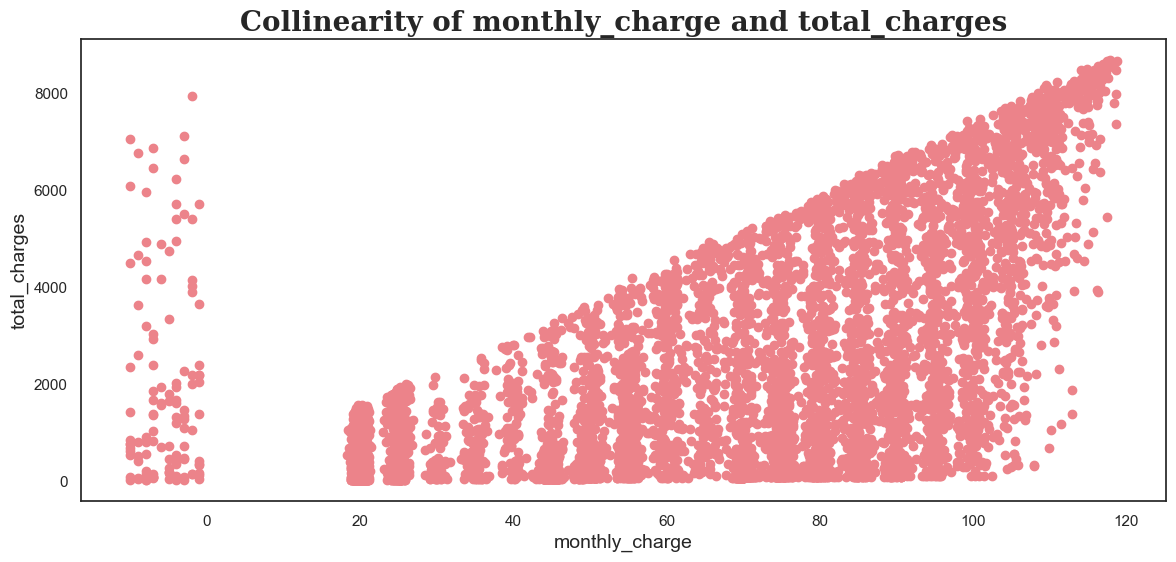

In [98]:
plt.figure(figsize=(14, 6))
plt.scatter(x=df2['monthly_charge'], y=df2['total_charges'], color=color[0])

plt.title('Collinearity of monthly_charge and total_charges', fontsize=20, fontweight = 'bold', fontfamily = 'serif')
plt.xlabel('monthly_charge', fontsize=14)
plt.ylabel('total_charges', fontsize=14)

plt.show()

In [99]:
df2 = df2.drop(columns = 'total_charges')
print(calc_vif(df2))

                            variables        VIF
0                              gender   1.975784
1                             married   3.909172
2                number_of_dependents   1.536735
3                 number_of_referrals   2.664541
4                    tenure_in_months   6.144328
5                       phone_service   7.713572
6   avg_monthly_long_distance_charges   6.299669
7                    internet_service  12.248584
8             avg_monthly_gb_download   3.511496
9                   paperless_billing   2.817897
10                     monthly_charge  16.808739
11                      total_refunds   1.067779
12           total_extra_data_charges   1.105266
13        total_long_distance_charges   5.600230
14                             senior   1.345050


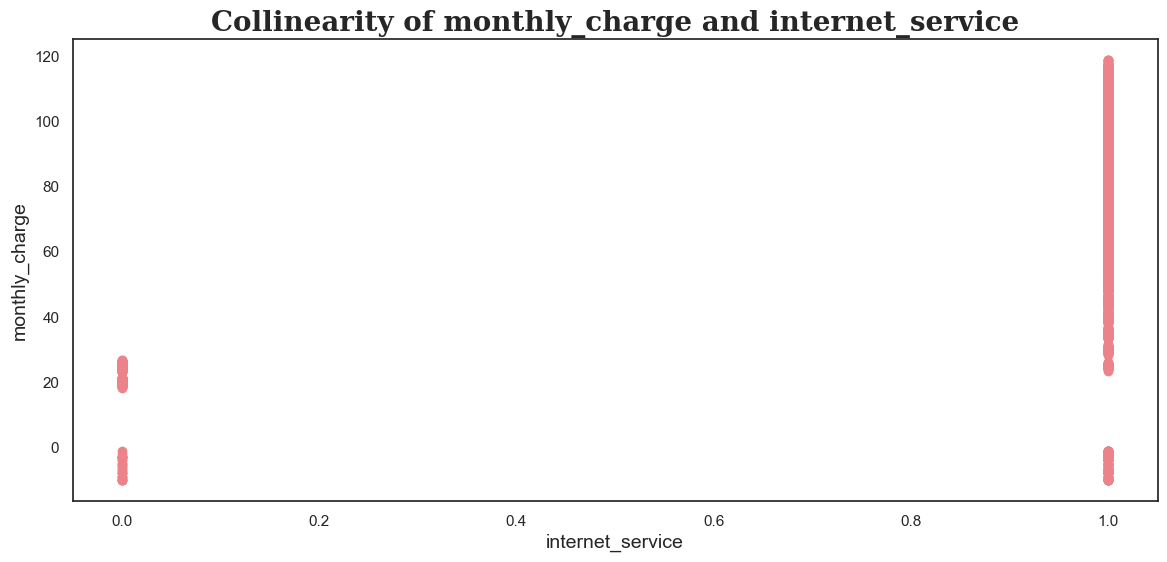

In [100]:
plt.figure(figsize=(14, 6))
plt.scatter(y=df2['monthly_charge'], x=df2['internet_service'], color=color[0])

plt.title('Collinearity of monthly_charge and internet_service', fontsize=20, fontweight = 'bold', fontfamily = 'serif')
plt.ylabel('monthly_charge', fontsize=14)
plt.xlabel('internet_service', fontsize=14)

plt.show()

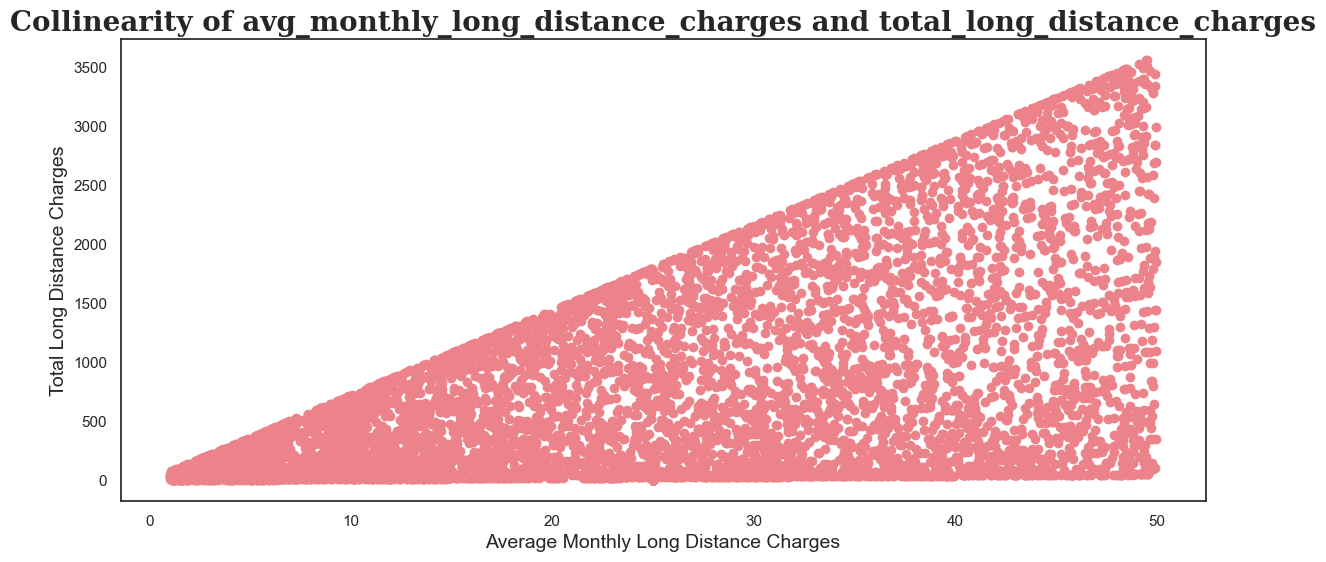

In [101]:
plt.figure(figsize=(14, 6))
plt.scatter(x=df2['avg_monthly_long_distance_charges'], y=df2['total_long_distance_charges'], color=color[0])

plt.title('Collinearity of avg_monthly_long_distance_charges and total_long_distance_charges', fontsize=20, fontweight = 'bold', fontfamily = 'serif')
plt.xlabel('Average Monthly Long Distance Charges', fontsize=14)
plt.ylabel('Total Long Distance Charges', fontsize=14)

plt.show()

In [102]:
df2 = df2.drop(columns = 'avg_monthly_long_distance_charges')
print(calc_vif(df2))

                      variables        VIF
0                        gender   1.937807
1                       married   3.906864
2          number_of_dependents   1.535008
3           number_of_referrals   2.664490
4              tenure_in_months   5.449777
5                 phone_service   6.938750
6              internet_service  10.765320
7       avg_monthly_gb_download   3.373176
8             paperless_billing   2.798904
9                monthly_charge  16.140359
10                total_refunds   1.067747
11     total_extra_data_charges   1.105263
12  total_long_distance_charges   3.579864
13                       senior   1.341450


In [103]:
df2 = df2.drop(columns = 'internet_service')
print(calc_vif(df2))

                      variables       VIF
0                        gender  1.899054
1                       married  3.905481
2          number_of_dependents  1.533577
3           number_of_referrals  2.664300
4              tenure_in_months  5.449739
5                 phone_service  6.648961
6       avg_monthly_gb_download  3.215912
7             paperless_billing  2.726840
8                monthly_charge  6.883333
9                 total_refunds  1.066744
10     total_extra_data_charges  1.098137
11  total_long_distance_charges  3.499112
12                       senior  1.335663


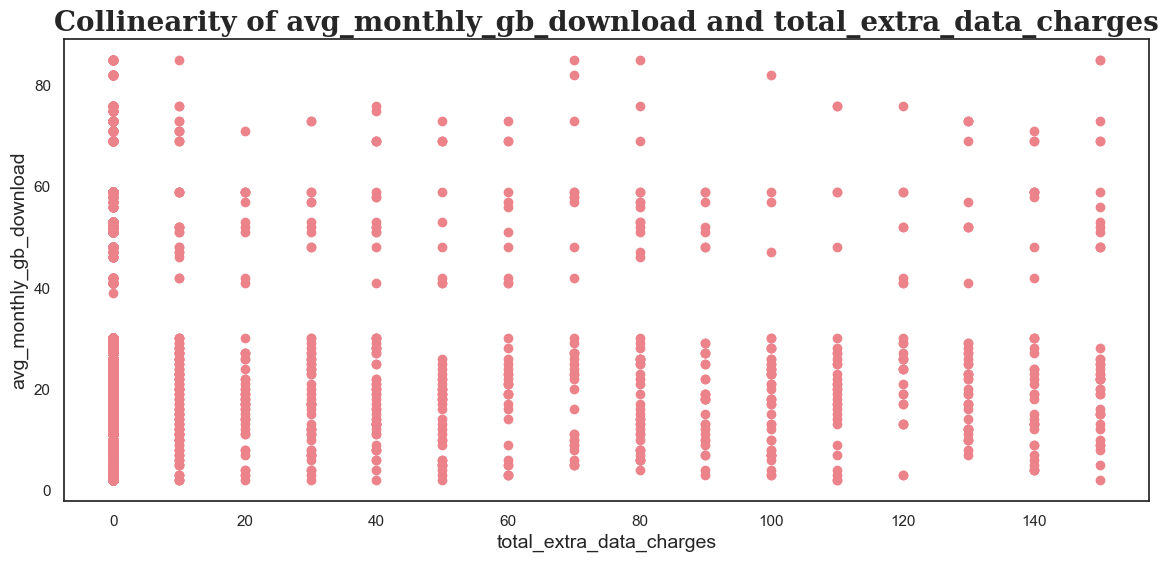

In [104]:
plt.figure(figsize=(14, 6))
plt.scatter(y=df2['avg_monthly_gb_download'], x=df2['total_extra_data_charges'], color=color[0])

plt.title('Collinearity of avg_monthly_gb_download and total_extra_data_charges', fontsize=20, fontweight = 'bold', fontfamily = 'serif')
plt.ylabel('avg_monthly_gb_download', fontsize=14)
plt.xlabel('total_extra_data_charges', fontsize=14)

plt.show()

In [105]:
print(calc_vif(df2))

                      variables       VIF
0                        gender  1.899054
1                       married  3.905481
2          number_of_dependents  1.533577
3           number_of_referrals  2.664300
4              tenure_in_months  5.449739
5                 phone_service  6.648961
6       avg_monthly_gb_download  3.215912
7             paperless_billing  2.726840
8                monthly_charge  6.883333
9                 total_refunds  1.066744
10     total_extra_data_charges  1.098137
11  total_long_distance_charges  3.499112
12                       senior  1.335663


In [106]:
df = df.drop(columns = ['total_revenue', 'total_charges', 'avg_monthly_long_distance_charges', 'internet_service'])
df.head()

customer_id  gender  married  number_of_dependents  number_of_referrals  \
0  0002-ORFBO       0        1                     0                    2   
1  0003-MKNFE       1        0                     0                    0   
2  0004-TLHLJ       1        0                     0                    0   
3  0011-IGKFF       1        1                     0                    1   
4  0013-EXCHZ       0        1                     0                    3   

   tenure_in_months    offer  phone_service multiple_lines internet_type  ...  \
0                 9     None              1             No         Cable  ...   
1                 9     None              1            Yes         Cable  ...   
2                 4  Offer E              1             No   Fiber Optic  ...   
3                13  Offer D              1             No   Fiber Optic  ...   
4                 3     None              1             No   Fiber Optic  ...   

         contract paperless_billing   payment_method monthly_charge  \
0        One Year                 1      Credit Card           65.6   
1  Month-to-Month                 0      Credit Card           -4.0   
2  Month-to-Month                 1  Bank Withdrawal           73.9   
3  Month-to-Month                 1  Bank Withdrawal           98.0   
4  Month-to-Month                 1      Credit Card           83.9   

  total_refunds total_extra_data_charges total_long_distance_charges churn  \
0          0.00                        0                      381.51     0   
1         38.33                       10                       96.21     0   
2          0.00                        0                      134.60     1   
3          0.00                        0                      361.66     1   
4          0.00                        0                       22.14     1   

  senior referrals  
0      0    Over 2  
1      0         0  
2      0         0  
3      1         1  
4      1    Over 2  

[5 rows x 29 columns]

## 9. 범주형 데이터 인코딩
- 2개 이상의 고유 값이 있는 범주형 변수는 get_dummies 메서드를 사용하여 레이블 인코딩 및 원-핫 인코딩 처리했습니다.

In [107]:
df.head()

customer_id  gender  married  number_of_dependents  number_of_referrals  \
0  0002-ORFBO       0        1                     0                    2   
1  0003-MKNFE       1        0                     0                    0   
2  0004-TLHLJ       1        0                     0                    0   
3  0011-IGKFF       1        1                     0                    1   
4  0013-EXCHZ       0        1                     0                    3   

   tenure_in_months    offer  phone_service multiple_lines internet_type  ...  \
0                 9     None              1             No         Cable  ...   
1                 9     None              1            Yes         Cable  ...   
2                 4  Offer E              1             No   Fiber Optic  ...   
3                13  Offer D              1             No   Fiber Optic  ...   
4                 3     None              1             No   Fiber Optic  ...   

         contract paperless_billing   payment_method monthly_charge  \
0        One Year                 1      Credit Card           65.6   
1  Month-to-Month                 0      Credit Card           -4.0   
2  Month-to-Month                 1  Bank Withdrawal           73.9   
3  Month-to-Month                 1  Bank Withdrawal           98.0   
4  Month-to-Month                 1      Credit Card           83.9   

  total_refunds total_extra_data_charges total_long_distance_charges churn  \
0          0.00                        0                      381.51     0   
1         38.33                       10                       96.21     0   
2          0.00                        0                      134.60     1   
3          0.00                        0                      361.66     1   
4          0.00                        0                       22.14     1   

  senior referrals  
0      0    Over 2  
1      0         0  
2      0         0  
3      1         1  
4      1    Over 2  

[5 rows x 29 columns]

In [108]:
df.columns

Index(['customer_id', 'gender', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'multiple_lines', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges', 'churn',
       'senior', 'referrals'],
      dtype='object')

In [109]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['gender', 'married', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'paperless_billing', 'total_extra_data_charges', 'churn', 'senior'], float64: ['avg_monthly_gb_download', 'monthly_charge', 'total_refunds', 'total_long_distance_charges'], object: ['customer_id', 'offer', 'multiple_lines', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'payment_method', 'referrals']}

In [110]:
identity = df['customer_id']
df = df.drop(['customer_id'], axis = 1)
df.head()

gender  married  number_of_dependents  number_of_referrals  \
0       0        1                     0                    2   
1       1        0                     0                    0   
2       1        0                     0                    0   
3       1        1                     0                    1   
4       0        1                     0                    3   

   tenure_in_months    offer  phone_service multiple_lines internet_type  \
0                 9     None              1             No         Cable   
1                 9     None              1            Yes         Cable   
2                 4  Offer E              1             No   Fiber Optic   
3                13  Offer D              1             No   Fiber Optic   
4                 3     None              1             No   Fiber Optic   

   avg_monthly_gb_download  ...        contract paperless_billing  \
0                     16.0  ...        One Year                 1   
1                     10.0  ...  Month-to-Month                 0   
2                     30.0  ...  Month-to-Month                 1   
3                      4.0  ...  Month-to-Month                 1   
4                     11.0  ...  Month-to-Month                 1   

    payment_method monthly_charge total_refunds total_extra_data_charges  \
0      Credit Card           65.6          0.00                        0   
1      Credit Card           -4.0         38.33                       10   
2  Bank Withdrawal           73.9          0.00                        0   
3  Bank Withdrawal           98.0          0.00                        0   
4      Credit Card           83.9          0.00                        0   

  total_long_distance_charges churn senior  referrals  
0                      381.51     0      0     Over 2  
1                       96.21     0      0          0  
2                      134.60     1      0          0  
3                      361.66     1      1          1  
4                       22.14     1      1     Over 2  

[5 rows x 28 columns]

In [111]:
df = pd.get_dummies(df)
df = pd.concat([df, identity], axis = 1)
df.head()

gender  married  number_of_dependents  number_of_referrals  \
0       0        1                     0                    2   
1       1        0                     0                    0   
2       1        0                     0                    0   
3       1        1                     0                    1   
4       0        1                     0                    3   

   tenure_in_months  phone_service  avg_monthly_gb_download  \
0                 9              1                     16.0   
1                 9              1                     10.0   
2                 4              1                     30.0   
3                13              1                      4.0   
4                 3              1                     11.0   

   paperless_billing  monthly_charge  total_refunds  ...  \
0                  1            65.6           0.00  ...   
1                  0            -4.0          38.33  ...   
2                  1            73.9           0.00  ...   
3                  1            98.0           0.00  ...   
4                  1            83.9           0.00  ...   

   contract_Month-to-Month  contract_One Year  contract_Two Year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   

   payment_method_Bank Withdrawal  payment_method_Credit Card  \
0                               0                           1   
1                               0                           1   
2                               1                           0   
3                               1                           0   
4                               0                           1   

   payment_method_Mailed Check  referrals_0  referrals_1  referrals_Over 2  \
0                            0            0            0                 1   
1                            0            1            0                 0   
2                            0            1            0                 0   
3                            0            0            1                 0   
4                            0            0            0                 1   

   customer_id  
0   0002-ORFBO  
1   0003-MKNFE  
2   0004-TLHLJ  
3   0011-IGKFF  
4   0013-EXCHZ  

[5 rows x 61 columns]

In [112]:
df.to_csv('modeling2.csv', index = False)